

```
Final Project Draft Analysis
Aleksandra Moskal
04/13/2025

Dataset: For my final project, I investigated the 2022 Public
Libraries Survey (PLS) dataset from the Institute of Museum
and Library Services. The data file contains all registered
public libraries (9,243 total) from all 50 states and the DC
area.

Analysis Goals: One area I am interested in is whether
programs and resources are successful in increasing
visitation to the libraries themselves. More visitations may
result in more funds and more finances that the libraries
can use to invest back in additional resources or upkeep.
Another question is whether libraries pay librarians fairly
in relation to the local or state cost of living. This
will allow me the opportunity to pull in additional
data from other datasets, and merge along state or
local areas.

Question 1: Does access to public programs, public
utilities (i.e. Wi-Fi, computers, etc.) increase
visitation? Does this change in rural, urban, or
suburban areas? (Regression)

Question 2: Do libraries pay fairly in relation to the
local or state average cost of living? (Opportunity to
pull in additional data into the dataset, merging on
location) (Graphical)
```



# Final Project- Library Statistics

## Initialize Data

In [ ]:
!pip install pingouin

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
from collections import Counter
from scipy.stats import f
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import os

!pip install openpyxl
!pip install pyreadstat

In [ ]:
# Connect to Google Drive
from google.colab import drive

drive.mount('/content/drive')

# root_dir is the path to My_Drive folder.
root_dir = "/content/drive/My Drive/"

# Data is Stored in MESA 8430 Folder
data_folder = root_dir + "Colab Notebooks/MESA Prog"

# change directory to the data folder
os.chdir(data_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ajust how floating-point numbers are displayed when outputing a pandas DataFrame or Series
pd.options.display.float_format = '{:.6f}'.format

## Data Import

In [ ]:
# Import data
df = pd.read_csv("PLS_FY22_AE_pud22i.csv", encoding='latin-1') #https://www.imls.gov/research-evaluation/surveys/public-libraries-survey-pls

## How many rows
print(df.shape)
print("================")
print()

## Check missing in dataset
print(df.isna().sum())
print("================")
print()

## Check data type
print(df.dtypes)
print("================")
print()

## What variables are in the dataset?
df.head()

(9248, 192)

STABR       0
FSCSKEY     0
LIBID       0
LIBNAME     0
ADDRESS     0
           ..
C19REFER    0
C19OUTSD    0
C19XWIF2    0
C19XWIF3    0
C19STOTH    0
Length: 192, dtype: int64

STABR       object
FSCSKEY     object
LIBID       object
LIBNAME     object
ADDRESS     object
             ...  
C19REFER    object
C19OUTSD    object
C19XWIF2    object
C19XWIF3    object
C19STOTH    object
Length: 192, dtype: object



,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,ZIP4,ADDRES_M,CITY_M,...,GEOSCORE,GEOMTYPE,C19CLOSE,C19PUBSV,C19ECRD2,C19REFER,C19OUTSD,C19XWIF2,C19XWIF3,C19STOTH
0,AK,AK0001,AK0001-002,ANCHOR POINT PUBLIC LIBRARY,34020 NORTH FORK ROAD,ANCHOR POINT,99556,9150,P.O. BOX 129,ANCHOR POINT,...,100.000000,POINTADDRESS,M,M,M,N,M,M,M,M
1,AK,AK0002,AK0002-011,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,6055,3600 DENALI STREET,ANCHORAGE,...,100.000000,POINTADDRESS,N,Y,N,Y,N,N,Y,N
2,AK,AK0003,AK0003-002,ANDERSON COMMUNITY LIBRARY,101 FIRST STREET,ANDERSON,99744,M,P.O. BOX 3078,ANDERSON,...,99.620000,STREETADDRESS,Y,Y,Y,Y,N,Y,N,Y
3,AK,AK0006,AK0006-002,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,M,P.O. BOX 368,BETHEL,...,100.000000,MANUAL,N,N,N,N,N,N,N,N
4,AK,AK0007,AK0007-002,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,WASILLA,99623,9663,P.O. BOX 520829,BIG LAKE,...,99.580000,POINTADDRESS,Y,Y,Y,Y,Y,N,N,N


In [ ]:
# Import data
df_2 = pd.read_csv("22zpallagi(1).csv") #https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2022-zip-code-data-soi

## How many rows
print(df_2.shape)
print("================")
print()

## Check missing in dataset
print(df_2.isna().sum())
print("================")
print()

## Check data type
print(df_2.dtypes)
print("================")
print()

## What variables are in the dataset?
df_2.head(50)

(166131, 165)

STATEFIPS    0
STATE        0
zipcode      0
agi_stub     0
N1           0
            ..
A11900       0
N11902       0
A11902       0
N12000       0
A12000       0
Length: 165, dtype: int64

STATEFIPS      int64
STATE         object
zipcode        int64
agi_stub       int64
N1           float64
              ...   
A11900       float64
N11902       float64
A11902       float64
N12000       float64
A12000       float64
Length: 165, dtype: object



,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,659530.000000,422590.000000,71000.000000,154700.000000,610780.000000,24340.000000,...,0.000000,0.000000,63060.000000,54280.000000,543620.000000,1559881.000000,541480.000000,1552563.000000,2250.000000,5031.000000
1,1,AL,0,2,533640.000000,276250.000000,101050.000000,141040.000000,499310.000000,15050.000000,...,0.000000,0.000000,100320.000000,130848.000000,430380.000000,1339883.000000,427830.000000,1329439.000000,2780.000000,8556.000000
2,1,AL,0,3,304870.000000,134050.000000,109980.000000,51600.000000,286110.000000,9600.000000,...,0.000000,0.000000,88750.000000,186002.000000,216080.000000,585162.000000,212990.000000,573080.000000,4520.000000,12589.000000
3,1,AL,0,4,193020.000000,56350.000000,113100.000000,19090.000000,181390.000000,4530.000000,...,0.000000,0.000000,67040.000000,189833.000000,124860.000000,403052.000000,121760.000000,388581.000000,2840.000000,12190.000000
4,1,AL,0,5,315700.000000,45000.000000,252660.000000,12180.000000,297930.000000,9000.000000,...,140.000000,63.000000,138270.000000,657283.000000,177730.000000,748507.000000,169080.000000,671684.000000,10940.000000,80141.000000
5,1,AL,0,6,109460.000000,7950.000000,96190.000000,940.000000,103540.000000,2220.000000,...,54750.000000,223885.000000,59810.000000,1634928.000000,46530.000000,1184029.000000,33970.000000,456283.000000,13170.000000,649409.000000
6,1,AL,35004,1,1260.000000,880.000000,150.000000,210.000000,1170.000000,50.000000,...,0.000000,0.000000,130.000000,129.000000,990.000000,2071.000000,990.000000,2055.000000,0.000000,0.000000
7,1,AL,35004,2,1320.000000,770.000000,230.000000,280.000000,1230.000000,40.000000,...,0.000000,0.000000,270.000000,289.000000,1040.000000,3257.000000,1040.000000,3240.000000,30.000000,32.000000
8,1,AL,35004,3,1000.000000,480.000000,320.000000,160.000000,960.000000,30.000000,...,0.000000,0.000000,280.000000,614.000000,720.000000,1733.000000,720.000000,1719.000000,0.000000,0.000000
9,1,AL,35004,4,620.000000,200.000000,330.000000,70.000000,590.000000,0.000000,...,0.000000,0.000000,230.000000,608.000000,390.000000,1107.000000,380.000000,1088.000000,0.000000,0.000000


## Merge Datasets

In [ ]:
print(df.shape)
print(df_2.shape)

(9248, 192)
(166131, 165)


In [ ]:
df['zipcode'] = df['ZIP']

In [ ]:
#Merge left, then merge into full dataset

df2_agi_stub = df_2[['zipcode', 'agi_stub']]

df = pd.merge(df, df2_agi_stub, on='zipcode', how='left')


In [ ]:
# Check if agi_stub in df = 1 and zipcode 03053 in df = 1
check_agi_stub = df[(df['agi_stub'] == 1) & (df['zipcode'] == 3053)]

if not check_agi_stub.empty:
  print("There are rows where agi_stub is 1 and zipcode is 03053.")
  print(check_agi_stub)
else:
  print("No rows where agi_stub is 1 and zipcode is 03053")



There are rows where agi_stub is 1 and zipcode is 03053.
      STABR FSCSKEY    LIBID        LIBNAME           ADDRESS         CITY  \
29489    NH  NH0029  NH89125  LEACH LIBRARY  276 MAMMOTH ROAD  LONDONDERRY   

        ZIP  ZIP4          ADDRES_M       CITY_M  ...  C19CLOSE C19PUBSV  \
29489  3053  3003  276 MAMMOTH ROAD  LONDONDERRY  ...         N        Y   

      C19ECRD2  C19REFER C19OUTSD C19XWIF2 C19XWIF3 C19STOTH zipcode agi_stub  
29489        Y         Y        Y        Y        N        N    3053 1.000000  

[1 rows x 194 columns]


In [ ]:
# List of columns to remove
columns_to_remove = ['RSTATUS','STATSTRU','STATNAME','STATADDR','LONGITUD','LATITUDE','LSAGEOID','LSAGEORATIO','LSAGEOTYPE','CDCODE','CBSA','GEOSTATUS','GEOSCORE','GEOMTYPE']
df = df.drop(columns=columns_to_remove)
df.shape

(53793, 180)

# Question 1: Does access to public programs, public utilities (i.e. Wi-Fi, computers, etc.) increase visitation? Does this change in rural, urban, or suburban areas? (Regression)

## Data Cleaning Q1

1)	Does access to public programs, public utilities (i.e. Wi-Fi, computers, etc.) increase visitation? Does this change in rural, urban, or suburban areas? <br><br>


In [ ]:
# Remove outliers from predictors using IQR method
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

df = remove_outliers_iqr(df, 'WIFISESS')
df = remove_outliers_iqr(df, 'TOTPRO')
df = remove_outliers_iqr(df, 'HRS_OPEN')
df = remove_outliers_iqr(df, 'VISITS')

In [ ]:
df_q1 = df[['VISITS','STABR','zipcode', 'CITY','LIBNAME','CNTY','POPU_LSA','BKVOL','AUDIO_PH','VIDEO_PH','VIDEO_DL','HRS_OPEN','TOTPRO','TOTATTEN','PITUSR','WIFISESS','LOCALE_ADD']]
df_q1


,VISITS,STABR,zipcode,CITY,LIBNAME,CNTY,POPU_LSA,BKVOL,AUDIO_PH,VIDEO_PH,VIDEO_DL,HRS_OPEN,TOTPRO,TOTATTEN,PITUSR,WIFISESS,LOCALE_ADD
0,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,43
1,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,43
2,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,43
3,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,43
4,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53788,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,33
53789,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,33
53790,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,33
53791,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,33


In [ ]:
nan_counts = df_q1.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

# Count -1 in each column (numeric columns only)
zero_counts = df_q1.select_dtypes(include=np.number).eq(-1).sum()
print("\nZero counts per column (numeric columns only):")
print(zero_counts)

# Count -3 in each column (numeric columns only)
zero_counts = df_q1.select_dtypes(include=np.number).eq(-3).sum()
print("\nZero counts per column (numeric columns only):")
print(zero_counts)

# Count 0 in each column (numeric columns only)
zero_counts = df_q1.select_dtypes(include=np.number).eq(0).sum()
print("\nZero counts per column (numeric columns only):")
print(zero_counts)

Number of NaN values in each column:
VISITS        0
STABR         0
zipcode       0
CITY          0
LIBNAME       0
CNTY          0
POPU_LSA      0
BKVOL         0
AUDIO_PH      0
VIDEO_PH      0
VIDEO_DL      0
HRS_OPEN      0
TOTPRO        0
TOTATTEN      0
PITUSR        0
WIFISESS      0
LOCALE_ADD    0
dtype: int64

Zero counts per column (numeric columns only):
VISITS         169
zipcode          0
POPU_LSA         6
BKVOL          162
AUDIO_PH       162
VIDEO_PH       162
VIDEO_DL       163
HRS_OPEN      1819
TOTPRO        2127
TOTATTEN      2170
PITUSR         187
WIFISESS      8869
LOCALE_ADD       0
dtype: int64

Zero counts per column (numeric columns only):
VISITS        55
zipcode        0
POPU_LSA      55
BKVOL         55
AUDIO_PH      55
VIDEO_PH      55
VIDEO_DL      55
HRS_OPEN      55
TOTPRO        55
TOTATTEN      55
PITUSR        55
WIFISESS      55
LOCALE_ADD     0
dtype: int64

Zero counts per column (numeric columns only):
VISITS           80
zipcode           0


In [ ]:
# Drop rows where any column in df_q1 has a value of -1 or -3 <- All missing values are encoded -1 or -3 in dataset
df_q1c = df_q1[(df_q1 != -1).all(axis=1) & (df_q1 != -3).all(axis=1)]

In [ ]:
df_q1c.shape

(27499, 17)

In [ ]:
print(df_q1c.describe())
df_q1.describe()

            VISITS      zipcode      POPU_LSA         BKVOL      AUDIO_PH  \
count 27499.000000 27499.000000  27499.000000  27499.000000  27499.000000   
mean  15698.250991 42309.628314   7686.518637  24940.072330   1289.642678   
std   15418.163165 25350.678275  11554.207561  19305.923396   6677.915193   
min       0.000000  1001.000000     12.000000      0.000000      0.000000   
25%    3905.000000 14757.000000   1779.000000  12017.000000    230.000000   
50%    9801.000000 49340.000000   4365.000000  19043.000000    610.000000   
75%   23343.000000 61053.000000   9541.000000  32551.500000   1453.000000   
max   65564.000000 99950.000000 312549.000000 287925.000000 348296.000000   

          VIDEO_PH      VIDEO_DL     HRS_OPEN       TOTPRO     TOTATTEN  \
count 27499.000000  27499.000000 27499.000000 27499.000000 27499.000000   
mean   2415.795047   2670.013310  1978.901887   139.392814  2256.384341   
std    2317.570050  14598.758310   701.733257   132.416793  3025.492255   
min   

,VISITS,zipcode,POPU_LSA,BKVOL,AUDIO_PH,VIDEO_PH,VIDEO_DL,HRS_OPEN,TOTPRO,TOTATTEN,PITUSR,WIFISESS,LOCALE_ADD
count,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000
mean,14733.022118,44013.824718,7623.444799,24069.388928,1177.043566,2270.202306,2826.788123,1830.527882,125.866220,2033.212949,1784.492601,3014.061689,35.709973
std,15250.754832,27750.251497,12213.054186,19653.644982,5778.473317,2265.787867,13544.988968,814.478018,130.963593,2902.006486,3311.897404,4913.840745,8.330566
min,-3.000000,602.000000,-9.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,11.000000
25%,3217.000000,14459.250000,1536.000000,11217.000000,192.000000,786.000000,0.000000,1300.000000,24.000000,299.000000,300.000000,0.000000,32.000000
50%,8541.000000,50216.000000,4004.000000,18180.000000,555.000000,1642.000000,0.000000,1924.000000,83.000000,1085.000000,879.000000,856.000000,41.000000
75%,21463.000000,65608.000000,9232.000000,31355.000000,1350.000000,2998.000000,683.000000,2360.000000,186.000000,2673.000000,2137.500000,3622.000000,42.000000
max,65564.000000,99950.000000,395326.000000,287925.000000,348296.000000,24085.000000,689295.000000,4368.000000,633.000000,78761.000000,137068.000000,28123.000000,43.000000


## Question 1 Plots

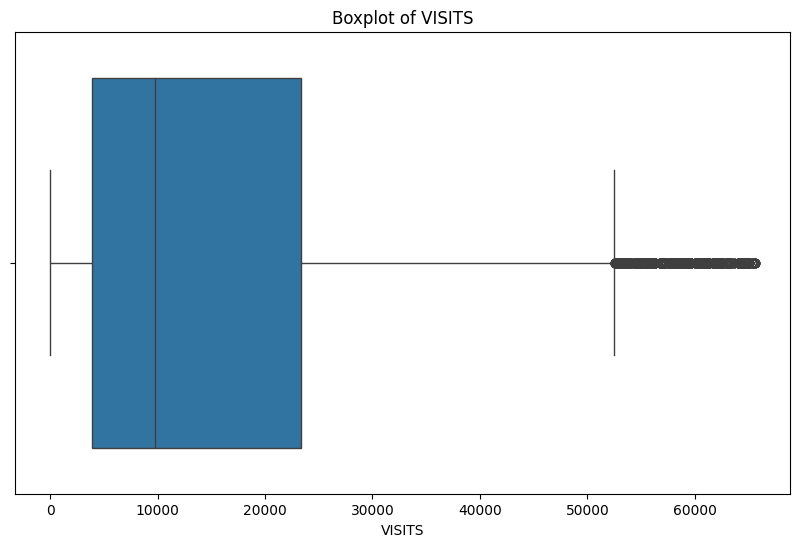

In [ ]:
#boxplot df_q1c VISITS

plt.figure(figsize=(10, 6))
sns.boxplot(x='VISITS', data=df_q1c)
plt.title('Boxplot of VISITS')
plt.show()

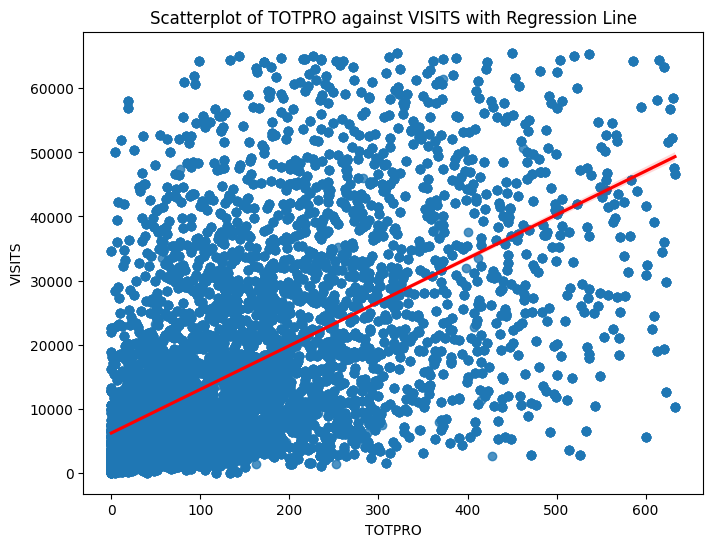

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='TOTPRO', y='VISITS', data=df_q1c, line_kws={'color': 'red'})
plt.xlabel('TOTPRO')
plt.ylabel('VISITS')
plt.title('Scatterplot of TOTPRO against VISITS with Regression Line')
plt.show()

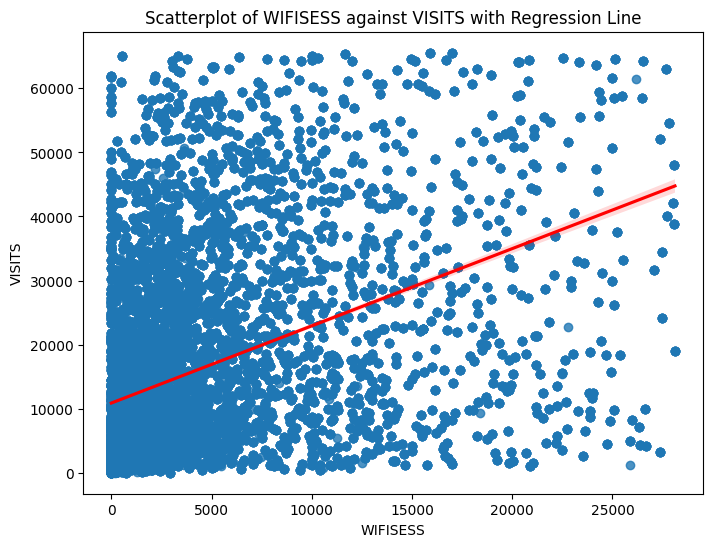

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='WIFISESS', y='VISITS', data=df_q1c, line_kws={'color': 'red'})
plt.xlabel('WIFISESS')
plt.ylabel('VISITS')
plt.title('Scatterplot of WIFISESS against VISITS with Regression Line')
plt.show()

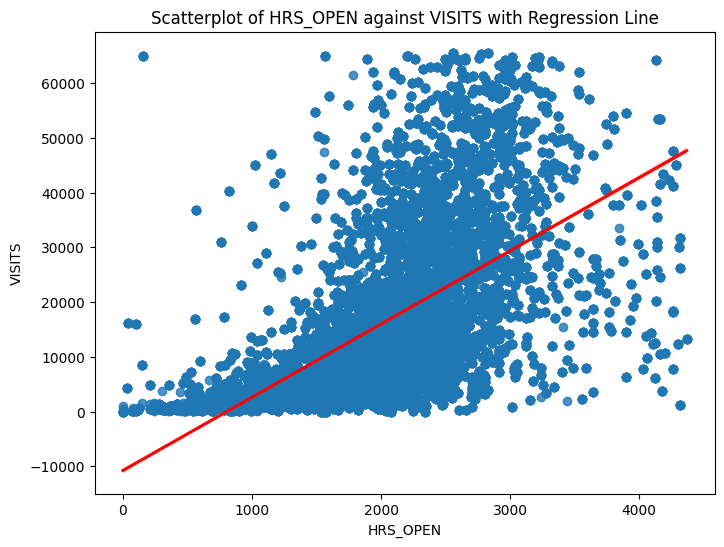

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='HRS_OPEN', y='VISITS', data=df_q1c, line_kws={'color': 'red'})
plt.xlabel('HRS_OPEN')
plt.ylabel('VISITS')
plt.title('Scatterplot of HRS_OPEN against VISITS with Regression Line')
plt.show()

In [ ]:
#Starter regression, not final model
# Define the dependent variable
y = df_q1c['VISITS']

# Define the independent variables
X2 = df_q1c[['WIFISESS','TOTPRO','HRS_OPEN']]

# Add a constant to the independent variables (this adds the intercept term)
X2 = sm.add_constant(X2)

# Fit the regression model
model2 = sm.OLS(y, X2).fit()

# get a summary of the regression models
print('\nModel with multiple predictors:', model2.summary())


Model with multiple predictors:                             OLS Regression Results                            
Dep. Variable:                 VISITS   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     9907.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:44:20   Log-Likelihood:            -2.9412e+05
No. Observations:               27499   AIC:                         5.883e+05
Df Residuals:                   27495   BIC:                         5.883e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9098.71

In [ ]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# Calculate Tolerance for each predictor
vif_data["Tolerance"] = 1 / vif_data["VIF"]

# Drop the constant term
vif_data = vif_data.drop(0)

# Print the result
print("Tolerance and VIF values:")
print(vif_data)

Tolerance and VIF values:
    Feature      VIF  Tolerance
1  WIFISESS 1.145929   0.872655
2    TOTPRO 1.312319   0.762010
3  HRS_OPEN 1.324906   0.754771


In [ ]:
# Calculate correlation matrix
# Exclude columns with non-numeric data types
numerical_cols = df_q1c.select_dtypes(include=np.number).columns
corr_matrix = df_q1c[numerical_cols].corr()

# Calculate p-values
p_values = pd.DataFrame(np.zeros((len(numerical_cols), len(numerical_cols))), columns=numerical_cols, index=numerical_cols)

for row in numerical_cols:
    for col in numerical_cols:
        if row != col:  # Avoid self-correlation
            _, p = pearsonr(df[row], df[col])
            p_values.loc[row, col] = p

# Create masks for significant correlations
significance_mask1 = p_values < 0.01
significance_mask2 = p_values < 0.05

# Annotate significant correlations in the correlation matrix
annot_matrix = corr_matrix.round(2).astype(str)
for row in numerical_cols:
    for col in numerical_cols:
        if row != col:  # Avoid self-correlation
            if significance_mask1.loc[row, col]:
                annot_matrix.loc[row, col] += '**'
            elif significance_mask2.loc[row, col]:
                annot_matrix.loc[row, col] += '*'

# Display the annotated correlation matrix
print("Bivariate Correlations")
print(annot_matrix)
print("** p_values < 0.01, * p_values < 0.05")

Bivariate Correlations
             VISITS  zipcode POPU_LSA    BKVOL AUDIO_PH VIDEO_PH VIDEO_DL  \
VISITS          1.0  -0.06**   0.45**   0.66**   0.17**   0.57**   0.12**   
zipcode     -0.06**      1.0  -0.04**  -0.04**  -0.03**  -0.05**    -0.01   
POPU_LSA     0.45**  -0.04**      1.0   0.57**    0.1**   0.37**   0.06**   
BKVOL        0.66**  -0.04**   0.57**      1.0   0.18**   0.64**    0.1**   
AUDIO_PH     0.17**  -0.03**    0.1**   0.18**      1.0   0.24**    0.1**   
VIDEO_PH     0.57**  -0.05**   0.37**   0.64**   0.24**      1.0   0.12**   
VIDEO_DL     0.12**    -0.01   0.06**    0.1**    0.1**   0.12**      1.0   
HRS_OPEN     0.61**   0.03**   0.37**   0.56**   0.12**   0.49**   0.11**   
TOTPRO       0.59**  -0.16**   0.25**    0.4**    0.1**    0.4**   0.12**   
TOTATTEN     0.54**  -0.02**   0.26**   0.38**   0.09**   0.35**   0.11**   
PITUSR       0.42**   0.05**    0.3**   0.39**   0.08**   0.31**   0.05**   
WIFISESS     0.41**   0.01**   0.21**   0.32**   0.08

In [ ]:
#Sanity check
df_q1c

,VISITS,STABR,zipcode,CITY,LIBNAME,CNTY,POPU_LSA,BKVOL,AUDIO_PH,VIDEO_PH,VIDEO_DL,HRS_OPEN,TOTPRO,TOTATTEN,PITUSR,WIFISESS,LOCALE_ADD
0,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,43
1,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,43
2,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,43
3,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,43
4,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53788,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,33
53789,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,33
53790,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,33
53791,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,33


In [ ]:
# Categoricalize Locale_add
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(11, 'City')
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(12, 'City')
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(13, 'City')
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(21, 'Suburb')
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(22, 'Suburb')
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(23, 'Suburb')
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(31, 'Town')
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(32, 'Town')
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(33, 'Town')
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(41, 'Rural')
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(42, 'Rural')
df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(43, 'Rural')


<ipython-input-507-dd9001b46769>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(11, 'City')
<ipython-input-507-dd9001b46769>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1c['LOCALE_ADD'] = df_q1c['LOCALE_ADD'].replace(12, 'City')
<ipython-input-507-dd9001b46769>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
#Sanity check
df_q1c

,VISITS,STABR,zipcode,CITY,LIBNAME,CNTY,POPU_LSA,BKVOL,AUDIO_PH,VIDEO_PH,VIDEO_DL,HRS_OPEN,TOTPRO,TOTATTEN,PITUSR,WIFISESS,LOCALE_ADD
0,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,Rural
1,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,Rural
2,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,Rural
3,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,Rural
4,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53788,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,Town
53789,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,Town
53790,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,Town
53791,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,Town


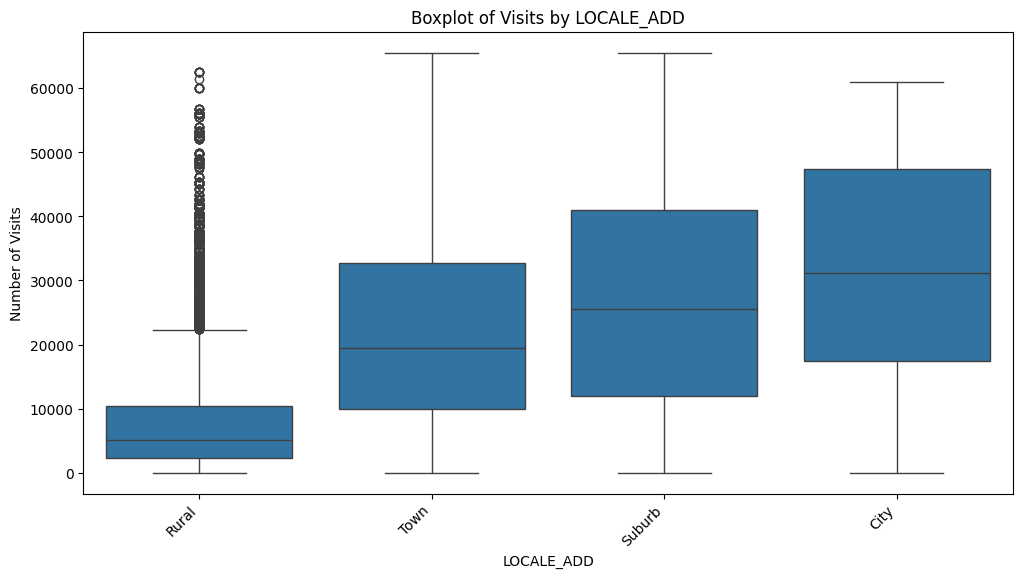

In [ ]:
#boxplot of visits by LOCALE_ADD

plt.figure(figsize=(12, 6))
sns.boxplot(x='LOCALE_ADD', y='VISITS', data=df_q1c)
plt.title('Boxplot of Visits by LOCALE_ADD')
plt.xlabel('LOCALE_ADD')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
#Sanity check
df_q1c

,VISITS,STABR,zipcode,CITY,LIBNAME,CNTY,POPU_LSA,BKVOL,AUDIO_PH,VIDEO_PH,VIDEO_DL,HRS_OPEN,TOTPRO,TOTATTEN,PITUSR,WIFISESS,LOCALE_ADD
0,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,Rural
1,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,Rural
2,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,Rural
3,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,Rural
4,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53788,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,Town
53789,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,Town
53790,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,Town
53791,25230,WY,82701,NEWCASTLE,WESTON COUNTY LIBRARY SYSTEM,WESTON,6809,39049,1481,4781,953,3770,190,2218,1691,1203,Town


In [ ]:
#Adds dummy variables for regression so it can be read as categorical
df_q1c = pd.get_dummies(df_q1c, columns=['LOCALE_ADD'], prefix=['LOCALE_ADD'])

In [ ]:
# Replace True/False with 1/0 for locale_add
columns_to_replace = ['LOCALE_ADD_City', 'LOCALE_ADD_Rural', 'LOCALE_ADD_Suburb', 'LOCALE_ADD_Town']

for col in columns_to_replace:
    if col in df_q1c.columns:
        df_q1c[col] = df_q1c[col].astype(int)
    else:
        print(f"Something is wrong")


In [ ]:
df_q1c.head()

,VISITS,STABR,zipcode,CITY,LIBNAME,CNTY,POPU_LSA,BKVOL,AUDIO_PH,VIDEO_PH,VIDEO_DL,HRS_OPEN,TOTPRO,TOTATTEN,PITUSR,WIFISESS,LOCALE_ADD_City,LOCALE_ADD_Rural,LOCALE_ADD_Suburb,LOCALE_ADD_Town
0,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,0,1,0,0
1,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,0,1,0,0
2,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,0,1,0,0
3,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,0,1,0,0
4,5127,AK,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,19307,186,3594,0,1404,150,898,1074,4591,0,1,0,0


## Regression City

In [ ]:
# Define the dependent variable
y = df_q1c['VISITS']

# Define the independent variables
X2 = df_q1c[['WIFISESS','TOTPRO','HRS_OPEN','LOCALE_ADD_City']]

# Add a constant to the independent variables (this adds the intercept term)
X2 = sm.add_constant(X2)

# Fit the regression model
model2 = sm.OLS(y, X2).fit()

# get a summary of the regression models
print('\nModel with multiple predictors:', model2.summary())


Model with multiple predictors:                             OLS Regression Results                            
Dep. Variable:                 VISITS   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     7468.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:44:21   Log-Likelihood:            -2.9409e+05
No. Observations:               27499   AIC:                         5.882e+05
Df Residuals:                   27494   BIC:                         5.882e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const    

In [ ]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# Calculate Tolerance for each predictor
vif_data["Tolerance"] = 1 / vif_data["VIF"]

# Drop the constant term
vif_data = vif_data.drop(0)

# Print the result
print("Tolerance and VIF values:")
print(vif_data)


Tolerance and VIF values:
           Feature      VIF  Tolerance
1         WIFISESS 1.146969   0.871863
2           TOTPRO 1.314068   0.760996
3         HRS_OPEN 1.325014   0.754709
4  LOCALE_ADD_City 1.003090   0.996920


## Regression City Validation

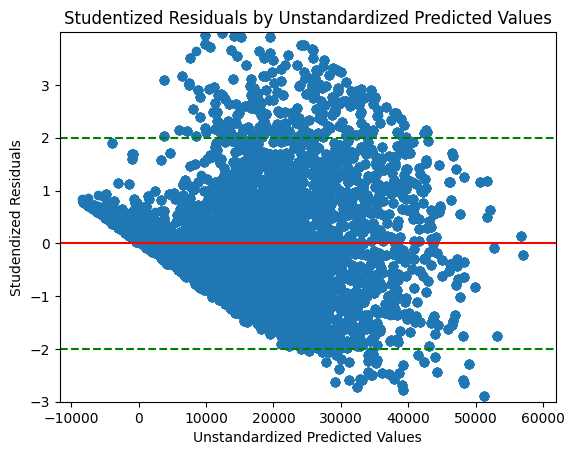

In [ ]:
#Generate the unstandardized predicted values
X2 = sm.add_constant(X2)  # Adds a constant term to the predictors
model = sm.OLS(y, X2).fit()
df_q1c['predicted_score'] = model.predict(X2)

# Generate the studendized residuals
df_q1c['studentized_residuals'] = model.get_influence().resid_studentized_internal

# Create scatter plot of Studendized residuals by Unstandardized Predicted Values
plt.scatter(df_q1c['predicted_score'], df_q1c['studentized_residuals'], label='Data')
#plt.xlim(0, 1)
#plt.xticks(np.arange(850, 1120, 50))
plt.ylim(-3, 4)
plt.yticks(np.arange(-3, 4, 1))

plt.xlabel('Unstandardized Predicted Values')
plt.ylabel('Studendized Residuals')
plt.title('Studentized Residuals by Unstandardized Predicted Values')

# Add reference lines y=0, y=2, y=-2
plt.axhline(y=0, color='red', linestyle='-', label='Reference Line at y=0')
plt.axhline(y=2, color='green', linestyle='--', label='Reference Line at y=2')
plt.axhline(y=-2, color='green', linestyle='--', label='Reference Line at y=-2')

plt.show()

In [ ]:
# Calculate Cook's D
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
df_q1c['Cooks_D'] = cooks_d

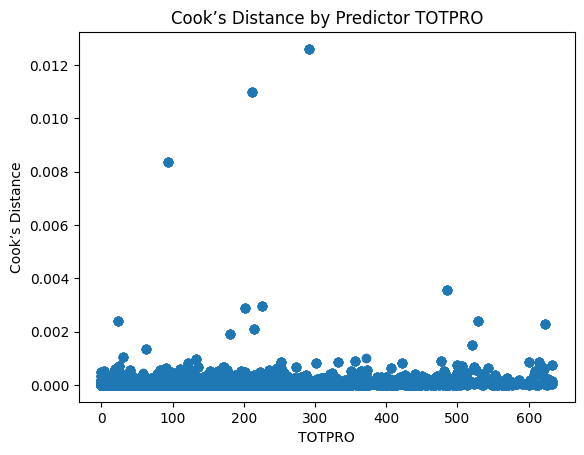

In [ ]:
# Create a scatter plot of Cook’s Distance by Predictor EXPEND
plt.scatter(df_q1c['TOTPRO'], df_q1c['Cooks_D'], label = 'Data')

#plt.ylim(0, 0.16)
#plt.yticks(np.arange(0, 0.16, 0.05))

# Add label and title
plt.xlabel('TOTPRO')
plt.ylabel('Cook’s Distance')
plt.title('Cook’s Distance by Predictor TOTPRO')

# Label each points
#for i in range(len(df)):
#   plt.annotate(df['DbaseID'][i], (df['DBH (cm)'][i], df['Cooks_D'][i]))

plt.show()

In [ ]:
# Standardized residuals above 2 are considered outliers in this case
df_q1c['residuals'] = model.resid

# Add predicted values (fitted values) to the dataframe
df_q1c['predicted_values'] = model.fittedvalues

std_residuals = np.std(df_q1c['residuals'], ddof=3)

# Calculate the standardized residuals
df_q1c['standardized_residuals'] = df_q1c['residuals'] / std_residuals

outliers = df_q1c[np.abs(df_q1c['standardized_residuals']) > 2]
print("\n========== Outliers ===========")
print(outliers)


========== Outliers ===========
       VISITS STABR  zipcode              CITY  \
130     38568    AK    99645            PALMER   
131     38568    AK    99645            PALMER   
132     38568    AK    99645            PALMER   
133     38568    AK    99645            PALMER   
134     38568    AK    99645            PALMER   
...       ...   ...      ...               ...   
53145   53758    WV    25303  SOUTH CHARLESTON   
53146   53758    WV    25303  SOUTH CHARLESTON   
53147   53758    WV    25303  SOUTH CHARLESTON   
53148   53758    WV    25303  SOUTH CHARLESTON   
53149   53758    WV    25303  SOUTH CHARLESTON   

                               LIBNAME               CNTY  POPU_LSA  BKVOL  \
130              PALMER PUBLIC LIBRARY  MATANUSKA-SUSITNA     28295  61821   
131              PALMER PUBLIC LIBRARY  MATANUSKA-SUSITNA     28295  61821   
132              PALMER PUBLIC LIBRARY  MATANUSKA-SUSITNA     28295  61821   
133              PALMER PUBLIC LIBRARY  MATANUSKA-SUSI

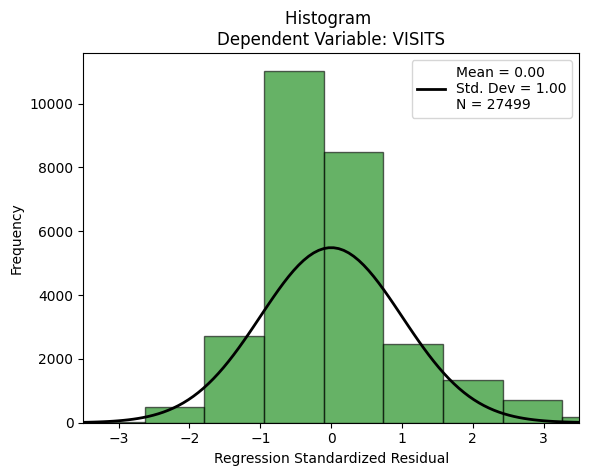

In [ ]:
# The standardized_residuals was created in above analysis
# Calculate statistics
mean = np.mean(df_q1c['standardized_residuals'])
std_dev = np.std(df_q1c['standardized_residuals'])
n = len(df_q1c['standardized_residuals'])

# Set the number of bins as identified from SPSS
bins_std_res = 12

# Create histogram (with actual frequencies on y-axis)
plt.hist(df_q1c['standardized_residuals'], bins=bins_std_res, density=False, alpha=0.6, color='g', edgecolor='black')

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.xticks(np.arange(-3, 3.5, 1))

# Generate x values for the normal curve
x = np.linspace(-3.5, 3.5, 100)

# Calculate the normal distribution curve (scaled to match the histogram's total frequency)
p = norm.pdf(x, mean, std_dev) * n * (6.0 / bins_std_res)  # scale the curve to the histogram

# Plot the normal distribution line
plt.plot(x, p, 'k', linewidth=2)

# Add legend with Mean, Std. Dev, and N
legend_text = f'Mean = {mean:.2f}\nStd. Dev = {std_dev:.2f}\nN = {n}'
plt.legend([legend_text], loc='upper right')

# Add labels and title
plt.title('Histogram \nDependent Variable: VISITS')
plt.xlabel('Regression Standardized Residual')
plt.ylabel('Frequency')

# Show plot
plt.show()

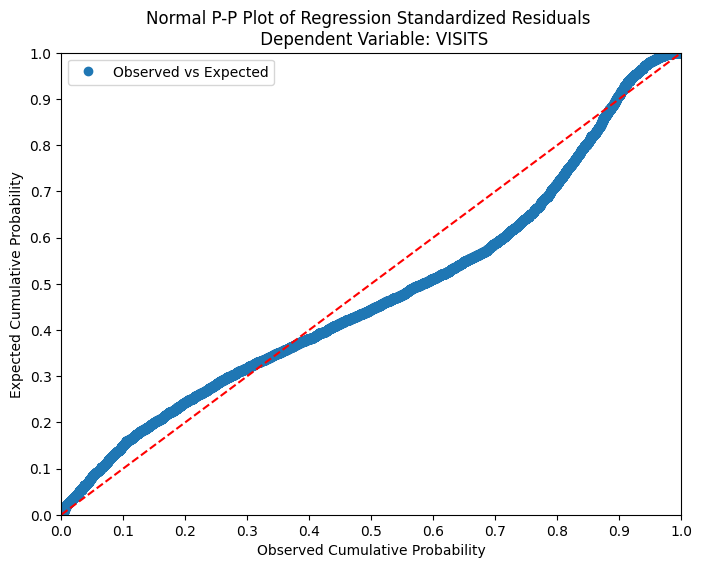

In [ ]:
# The standardized_residuals was created in above analysis
standardized_residuals = df_q1c['standardized_residuals']

# Rank-order the standardized residuals
sorted_residuals = np.sort(standardized_residuals)

# Calculate the observed cumulative probabilities
observed_cumprob = np.arange(1, len(sorted_residuals) + 1) / len(sorted_residuals)

# Calculate the expected cumulative probabilities based on a normal distribution
expected_cumprob = norm.cdf(sorted_residuals)

# Plot the observed cumulative probabilities against the expected cumulative probabilities
plt.figure(figsize=(8, 6))
plt.plot(observed_cumprob, expected_cumprob, 'o', label="Observed vs Expected")
plt.plot([0, 1], [0, 1], 'r--')

# Set axis limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Add labels and title
plt.title('Normal P-P Plot of Regression Standardized Residuals \n Dependent Variable: VISITS')
plt.xlabel('Observed Cumulative Probability')
plt.ylabel('Expected Cumulative Probability')
plt.legend()

# Show the plot
plt.show()

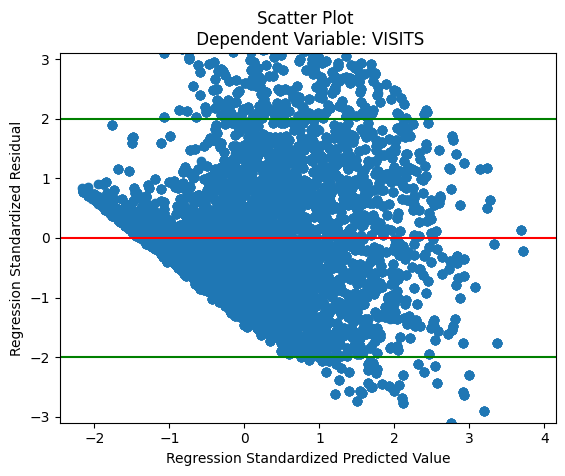

In [ ]:
from scipy.stats import zscore

# Get the predicted values of y
df_q1c['predicted_y'] = model.predict(X2)

# Standardized predictied value of the dependent variable
df_q1c['standardized_predicted_y'] = zscore(df_q1c['predicted_y'])

# Create scatter plot of Studendized residuals and predicted values
plt.scatter(df_q1c['standardized_predicted_y'], df_q1c['standardized_residuals'], label='Data')
#plt.xlim(-2.2, 2.2)
#plt.xticks(np.arange(-2, 2.2, 1))
plt.ylim(-3.1, 3.1)
plt.yticks(np.arange(-3, 3.1, 1))

plt.xlabel('Regression Standardized Predicted Value')
plt.ylabel('Regression Standardized Residual')
plt.title('Scatter Plot \n Dependent Variable: VISITS')

# Add two reference lines
plt.axhline(y=2, color='green', linestyle='-')
plt.axhline(y=-2, color='green', linestyle='-')

# Add reference lines
plt.axhline(y=0, color='red', linestyle='-')

# Filter out the data points with standardized_residuals > 2
high_standardized = df_q1c[np.abs(df_q1c['standardized_residuals']) > 2]

plt.show()

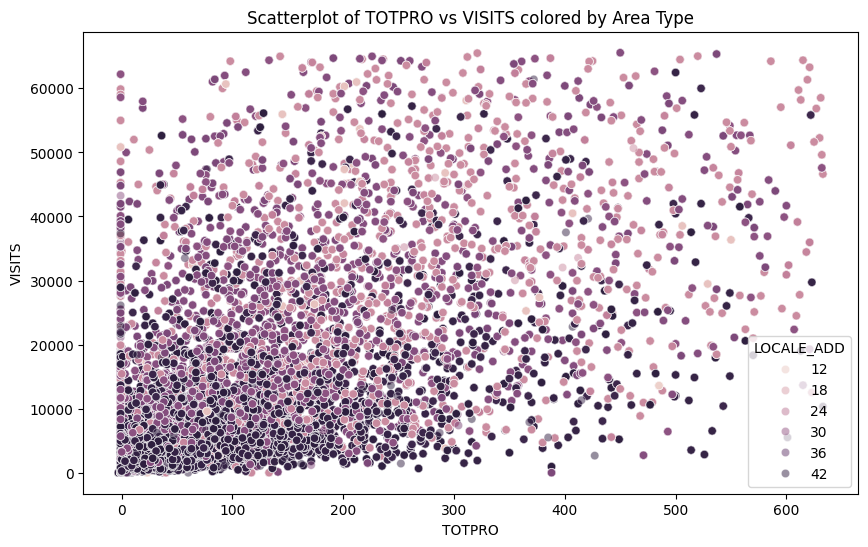

In [ ]:
#scatterplot of predictor and response with city, region, etc. Coding, not to be used but so i can see trending
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOTPRO', y='VISITS', hue='LOCALE_ADD', data=df, alpha=0.5)
plt.xlabel('TOTPRO')
plt.ylabel('VISITS')
plt.title('Scatterplot of TOTPRO vs VISITS colored by Area Type')
plt.show()


## Regression Rural

In [ ]:
# Define the dependent variable
y = df_q1c['VISITS']

# Define the independent variables
X2 = df_q1c[['WIFISESS','TOTPRO','HRS_OPEN','LOCALE_ADD_Rural']]

# Add a constant to the independent variables (this adds the intercept term)
X2 = sm.add_constant(X2)

# Fit the regression model
model2 = sm.OLS(y, X2).fit()

# get a summary of the regression models
print('\nModel with multiple predictors:', model2.summary())


Model with multiple predictors:                             OLS Regression Results                            
Dep. Variable:                 VISITS   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     8895.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:44:24   Log-Likelihood:            -2.9278e+05
No. Observations:               27499   AIC:                         5.856e+05
Df Residuals:                   27494   BIC:                         5.856e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const  

In [ ]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# Calculate Tolerance for each predictor
vif_data["Tolerance"] = 1 / vif_data["VIF"]

# Drop the constant term
vif_data = vif_data.drop(0)

# Print the result
print("Tolerance and VIF values:")
print(vif_data)

Tolerance and VIF values:
            Feature      VIF  Tolerance
1          WIFISESS 1.150120   0.869474
2            TOTPRO 1.345986   0.742950
3          HRS_OPEN 1.512915   0.660976
4  LOCALE_ADD_Rural 1.323650   0.755487


## Regression Rural Validation

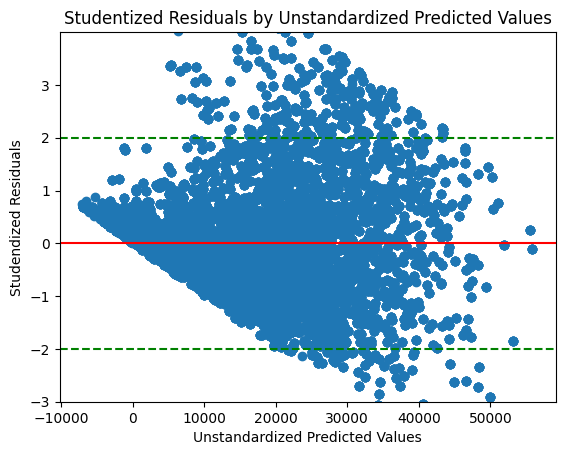

In [ ]:
#Generate the unstandardized predicted values
X2 = sm.add_constant(X2)  # Adds a constant term to the predictors
model = sm.OLS(y, X2).fit()
df_q1c['predicted_score'] = model.predict(X2)

# Generate the studendized residuals
df_q1c['studentized_residuals'] = model.get_influence().resid_studentized_internal

# Create scatter plot of Studendized residuals by Unstandardized Predicted Values
plt.scatter(df_q1c['predicted_score'], df_q1c['studentized_residuals'], label='Data')
#plt.xlim(0, 1)
#plt.xticks(np.arange(850, 1120, 50))
plt.ylim(-3, 4)
plt.yticks(np.arange(-3, 4, 1))

plt.xlabel('Unstandardized Predicted Values')
plt.ylabel('Studendized Residuals')
plt.title('Studentized Residuals by Unstandardized Predicted Values')

# Add reference lines y=0, y=2, y=-2
plt.axhline(y=0, color='red', linestyle='-', label='Reference Line at y=0')
plt.axhline(y=2, color='green', linestyle='--', label='Reference Line at y=2')
plt.axhline(y=-2, color='green', linestyle='--', label='Reference Line at y=-2')

plt.show()

In [ ]:
# Calculate Cook's D
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
df_q1c['Cooks_D'] = cooks_d

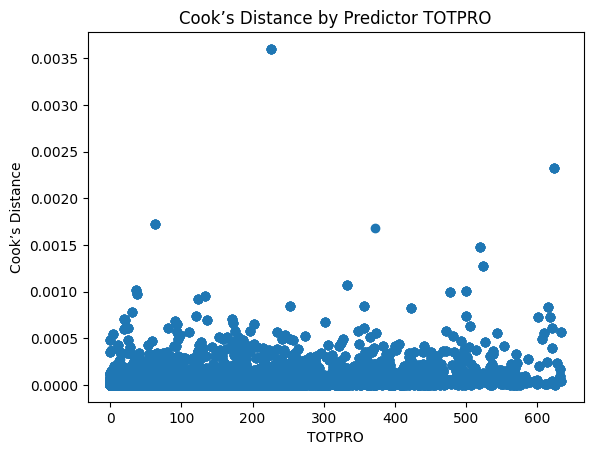

In [ ]:
# Create a scatter plot of Cook’s Distance by Predictor EXPEND
plt.scatter(df_q1c['TOTPRO'], df_q1c['Cooks_D'], label = 'Data')

#plt.ylim(0, 0.16)
#plt.yticks(np.arange(0, 0.16, 0.05))

# Add label and title
plt.xlabel('TOTPRO')
plt.ylabel('Cook’s Distance')
plt.title('Cook’s Distance by Predictor TOTPRO')

# Label each points
#for i in range(len(df)):
#   plt.annotate(df['DbaseID'][i], (df['DBH (cm)'][i], df['Cooks_D'][i]))

plt.show()

In [ ]:
# Standardized residuals above 2 are considered outliers in this case
df_q1c['residuals'] = model.resid

# Add predicted values (fitted values) to the dataframe
df_q1c['predicted_values'] = model.fittedvalues

std_residuals = np.std(df_q1c['residuals'], ddof=3)

# Calculate the standardized residuals
df_q1c['standardized_residuals'] = df_q1c['residuals'] / std_residuals

outliers = df_q1c[np.abs(df_q1c['standardized_residuals']) > 2]
print("\n========== Outliers ===========")
print(outliers)


========== Outliers ===========
       VISITS STABR  zipcode              CITY  \
433     56748    AL    36330        ENTERPRISE   
434     56748    AL    36330        ENTERPRISE   
435     56748    AL    36330        ENTERPRISE   
436     56748    AL    36330        ENTERPRISE   
437     56748    AL    36330        ENTERPRISE   
...       ...   ...      ...               ...   
53145   53758    WV    25303  SOUTH CHARLESTON   
53146   53758    WV    25303  SOUTH CHARLESTON   
53147   53758    WV    25303  SOUTH CHARLESTON   
53148   53758    WV    25303  SOUTH CHARLESTON   
53149   53758    WV    25303  SOUTH CHARLESTON   

                               LIBNAME     CNTY  POPU_LSA  BKVOL  AUDIO_PH  \
433          ENTERPRISE PUBLIC LIBRARY   COFFEE     43217  38386      1887   
434          ENTERPRISE PUBLIC LIBRARY   COFFEE     43217  38386      1887   
435          ENTERPRISE PUBLIC LIBRARY   COFFEE     43217  38386      1887   
436          ENTERPRISE PUBLIC LIBRARY   COFFEE     43

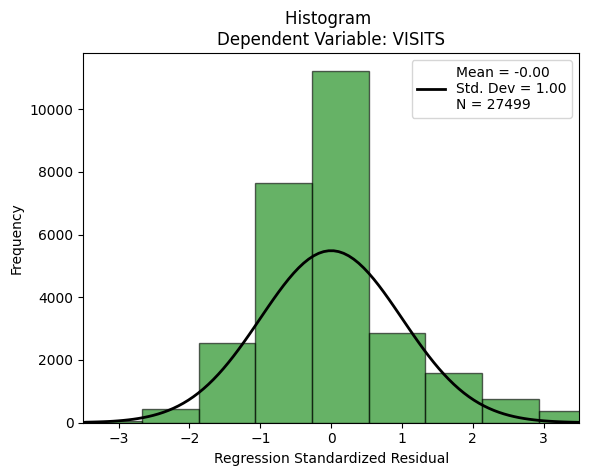

In [ ]:
# The standardized_residuals was created in above analysis
# Calculate statistics
mean = np.mean(df_q1c['standardized_residuals'])
std_dev = np.std(df_q1c['standardized_residuals'])
n = len(df_q1c['standardized_residuals'])

# Set the number of bins as identified from SPSS
bins_std_res = 12

# Create histogram (with actual frequencies on y-axis)
plt.hist(df_q1c['standardized_residuals'], bins=bins_std_res, density=False, alpha=0.6, color='g', edgecolor='black')

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.xticks(np.arange(-3, 3.5, 1))

# Generate x values for the normal curve
x = np.linspace(-3.5, 3.5, 100)

# Calculate the normal distribution curve (scaled to match the histogram's total frequency)
p = norm.pdf(x, mean, std_dev) * n * (6.0 / bins_std_res)  # scale the curve to the histogram

# Plot the normal distribution line
plt.plot(x, p, 'k', linewidth=2)

# Add legend with Mean, Std. Dev, and N
legend_text = f'Mean = {mean:.2f}\nStd. Dev = {std_dev:.2f}\nN = {n}'
plt.legend([legend_text], loc='upper right')

# Add labels and title
plt.title('Histogram \nDependent Variable: VISITS')
plt.xlabel('Regression Standardized Residual')
plt.ylabel('Frequency')

# Show plot
plt.show()

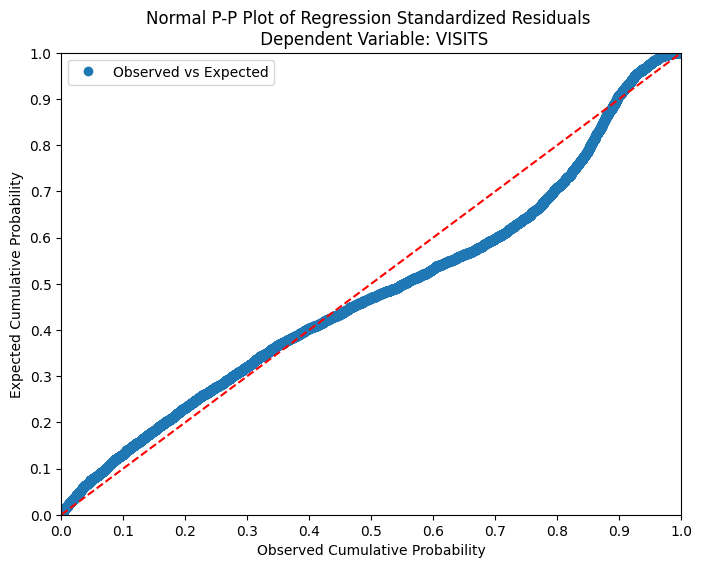

In [ ]:
# The standardized_residuals was created in above analysis
standardized_residuals = df_q1c['standardized_residuals']

# Rank-order the standardized residuals
sorted_residuals = np.sort(standardized_residuals)

# Calculate the observed cumulative probabilities
observed_cumprob = np.arange(1, len(sorted_residuals) + 1) / len(sorted_residuals)

# Calculate the expected cumulative probabilities based on a normal distribution
expected_cumprob = norm.cdf(sorted_residuals)

# Plot the observed cumulative probabilities against the expected cumulative probabilities
plt.figure(figsize=(8, 6))
plt.plot(observed_cumprob, expected_cumprob, 'o', label="Observed vs Expected")
plt.plot([0, 1], [0, 1], 'r--')

# Set axis limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Add labels and title
plt.title('Normal P-P Plot of Regression Standardized Residuals \n Dependent Variable: VISITS')
plt.xlabel('Observed Cumulative Probability')
plt.ylabel('Expected Cumulative Probability')
plt.legend()

# Show the plot
plt.show()

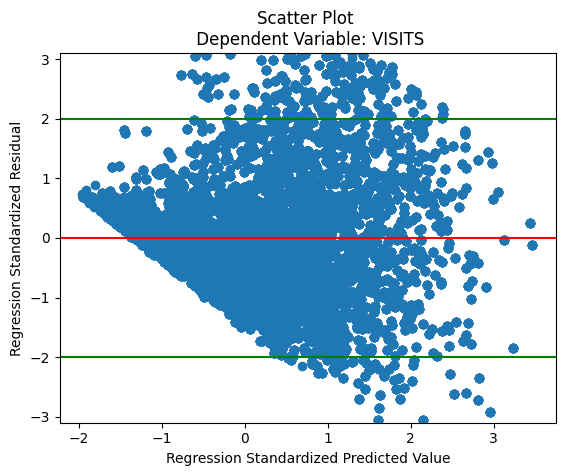

In [ ]:
from scipy.stats import zscore

# Get the predicted values of y
df_q1c['predicted_y'] = model.predict(X2)

# Standardized predictied value of the dependent variable
df_q1c['standardized_predicted_y'] = zscore(df_q1c['predicted_y'])

# Create scatter plot of Studendized residuals and predicted values
plt.scatter(df_q1c['standardized_predicted_y'], df_q1c['standardized_residuals'], label='Data')
#plt.xlim(-2.2, 2.2)
#plt.xticks(np.arange(-2, 2.2, 1))
plt.ylim(-3.1, 3.1)
plt.yticks(np.arange(-3, 3.1, 1))

plt.xlabel('Regression Standardized Predicted Value')
plt.ylabel('Regression Standardized Residual')
plt.title('Scatter Plot \n Dependent Variable: VISITS')

# Add two reference lines
plt.axhline(y=2, color='green', linestyle='-')
plt.axhline(y=-2, color='green', linestyle='-')

# Add reference lines
plt.axhline(y=0, color='red', linestyle='-')

# Filter out the data points with standardized_residuals > 2
high_standardized = df_q1c[np.abs(df_q1c['standardized_residuals']) > 2]

plt.show()

## Suburb Regression

In [ ]:
# Define the dependent variable
y = df_q1c['VISITS']

# Define the independent variables
X2 = df_q1c[['WIFISESS','TOTPRO','HRS_OPEN','LOCALE_ADD_Suburb']]

# Add a constant to the independent variables (this adds the intercept term)
X2 = sm.add_constant(X2)

# Fit the regression model
model2 = sm.OLS(y, X2).fit()

# get a summary of the regression models
print('\nModel with multiple predictors:', model2.summary())


Model with multiple predictors:                             OLS Regression Results                            
Dep. Variable:                 VISITS   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     7941.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:44:25   Log-Likelihood:            -2.9364e+05
No. Observations:               27499   AIC:                         5.873e+05
Df Residuals:                   27494   BIC:                         5.873e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const

In [ ]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# Calculate Tolerance for each predictor
vif_data["Tolerance"] = 1 / vif_data["VIF"]

# Drop the constant term
vif_data = vif_data.drop(0)

# Print the result
print("Tolerance and VIF values:")
print(vif_data)

Tolerance and VIF values:
             Feature      VIF  Tolerance
1           WIFISESS 1.146271   0.872394
2             TOTPRO 1.379433   0.724935
3           HRS_OPEN 1.357288   0.736763
4  LOCALE_ADD_Suburb 1.137807   0.878884


## Regression Suburb Validation

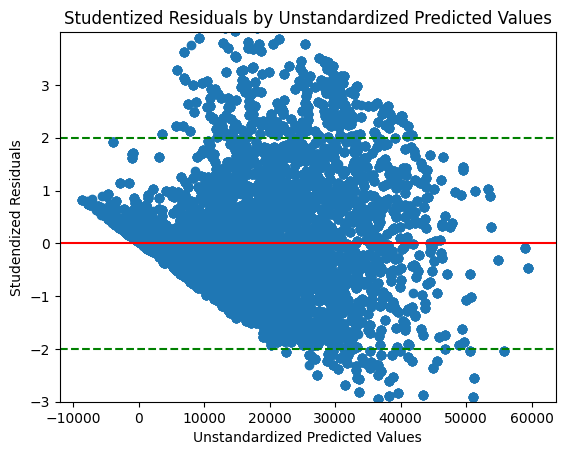

In [ ]:
#Generate the unstandardized predicted values
X2 = sm.add_constant(X2)  # Adds a constant term to the predictors
model = sm.OLS(y, X2).fit()
df_q1c['predicted_score'] = model.predict(X2)

# Generate the studendized residuals
df_q1c['studentized_residuals'] = model.get_influence().resid_studentized_internal

# Create scatter plot of Studendized residuals by Unstandardized Predicted Values
plt.scatter(df_q1c['predicted_score'], df_q1c['studentized_residuals'], label='Data')
#plt.xlim(0, 1)
#plt.xticks(np.arange(850, 1120, 50))
plt.ylim(-3, 4)
plt.yticks(np.arange(-3, 4, 1))

plt.xlabel('Unstandardized Predicted Values')
plt.ylabel('Studendized Residuals')
plt.title('Studentized Residuals by Unstandardized Predicted Values')

# Add reference lines y=0, y=2, y=-2
plt.axhline(y=0, color='red', linestyle='-', label='Reference Line at y=0')
plt.axhline(y=2, color='green', linestyle='--', label='Reference Line at y=2')
plt.axhline(y=-2, color='green', linestyle='--', label='Reference Line at y=-2')

plt.show()

In [ ]:
# Calculate Cook's D
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
df_q1c['Cooks_D'] = cooks_d

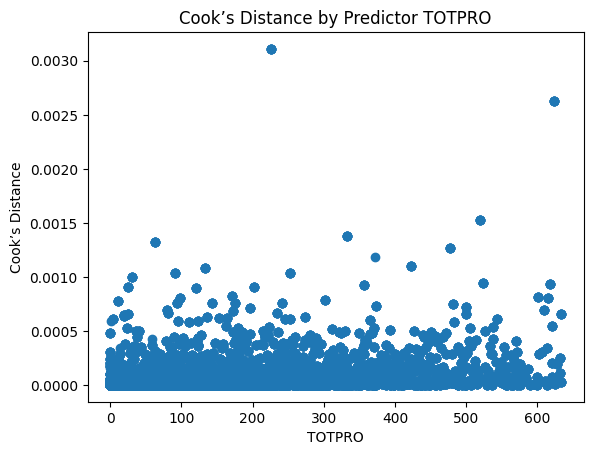

In [ ]:
# Create a scatter plot of Cook’s Distance by Predictor EXPEND
plt.scatter(df_q1c['TOTPRO'], df_q1c['Cooks_D'], label = 'Data')

#plt.ylim(0, 0.16)
#plt.yticks(np.arange(0, 0.16, 0.05))

# Add label and title
plt.xlabel('TOTPRO')
plt.ylabel('Cook’s Distance')
plt.title('Cook’s Distance by Predictor TOTPRO')

# Label each points
#for i in range(len(df)):
#   plt.annotate(df['DbaseID'][i], (df['DBH (cm)'][i], df['Cooks_D'][i]))

plt.show()

In [ ]:
# Standardized residuals above 2 are considered outliers in this case
df_q1c['residuals'] = model.resid

# Add predicted values (fitted values) to the dataframe
df_q1c['predicted_values'] = model.fittedvalues

std_residuals = np.std(df_q1c['residuals'], ddof=3)

# Calculate the standardized residuals
df_q1c['standardized_residuals'] = df_q1c['residuals'] / std_residuals

outliers = df_q1c[np.abs(df_q1c['standardized_residuals']) > 2]
print("\n========== Outliers ===========")
print(outliers)


========== Outliers ===========
       VISITS STABR  zipcode              CITY  \
130     38568    AK    99645            PALMER   
131     38568    AK    99645            PALMER   
132     38568    AK    99645            PALMER   
133     38568    AK    99645            PALMER   
134     38568    AK    99645            PALMER   
...       ...   ...      ...               ...   
53145   53758    WV    25303  SOUTH CHARLESTON   
53146   53758    WV    25303  SOUTH CHARLESTON   
53147   53758    WV    25303  SOUTH CHARLESTON   
53148   53758    WV    25303  SOUTH CHARLESTON   
53149   53758    WV    25303  SOUTH CHARLESTON   

                               LIBNAME               CNTY  POPU_LSA  BKVOL  \
130              PALMER PUBLIC LIBRARY  MATANUSKA-SUSITNA     28295  61821   
131              PALMER PUBLIC LIBRARY  MATANUSKA-SUSITNA     28295  61821   
132              PALMER PUBLIC LIBRARY  MATANUSKA-SUSITNA     28295  61821   
133              PALMER PUBLIC LIBRARY  MATANUSKA-SUSI

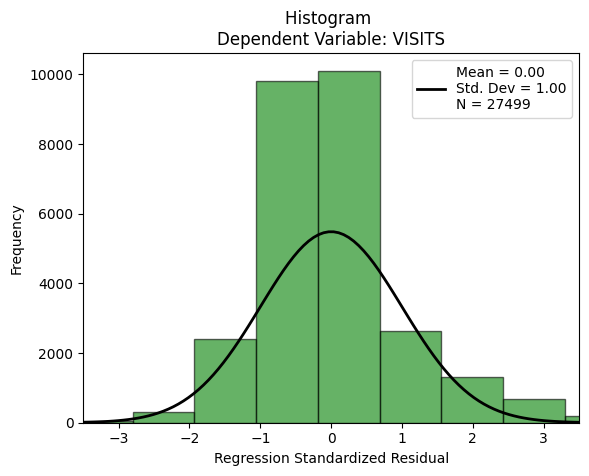

In [ ]:
# The standardized_residuals was created in above analysis
# Calculate statistics
mean = np.mean(df_q1c['standardized_residuals'])
std_dev = np.std(df_q1c['standardized_residuals'])
n = len(df_q1c['standardized_residuals'])

# Set the number of bins as identified from SPSS
bins_std_res = 12

# Create histogram (with actual frequencies on y-axis)
plt.hist(df_q1c['standardized_residuals'], bins=bins_std_res, density=False, alpha=0.6, color='g', edgecolor='black')

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.xticks(np.arange(-3, 3.5, 1))

# Generate x values for the normal curve
x = np.linspace(-3.5, 3.5, 100)

# Calculate the normal distribution curve (scaled to match the histogram's total frequency)
p = norm.pdf(x, mean, std_dev) * n * (6.0 / bins_std_res)  # scale the curve to the histogram

# Plot the normal distribution line
plt.plot(x, p, 'k', linewidth=2)

# Add legend with Mean, Std. Dev, and N
legend_text = f'Mean = {mean:.2f}\nStd. Dev = {std_dev:.2f}\nN = {n}'
plt.legend([legend_text], loc='upper right')

# Add labels and title
plt.title('Histogram \nDependent Variable: VISITS')
plt.xlabel('Regression Standardized Residual')
plt.ylabel('Frequency')

# Show plot
plt.show()

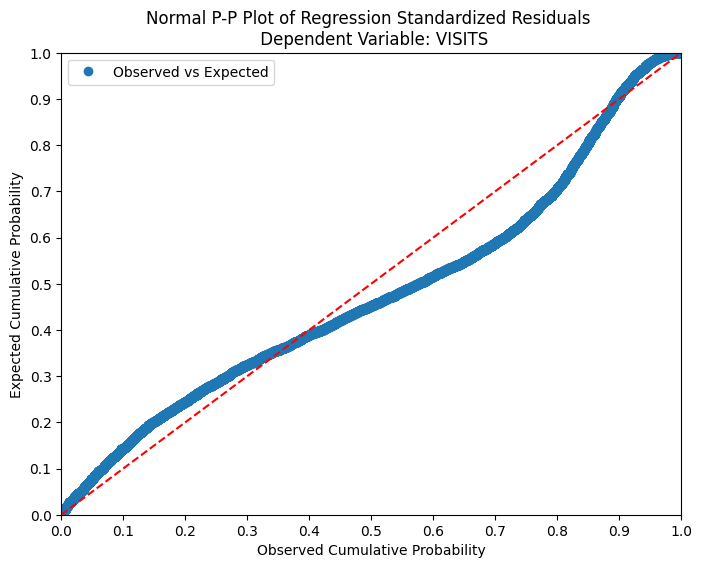

In [ ]:
# The standardized_residuals was created in above analysis
standardized_residuals = df_q1c['standardized_residuals']

# Rank-order the standardized residuals
sorted_residuals = np.sort(standardized_residuals)

# Calculate the observed cumulative probabilities
observed_cumprob = np.arange(1, len(sorted_residuals) + 1) / len(sorted_residuals)

# Calculate the expected cumulative probabilities based on a normal distribution
expected_cumprob = norm.cdf(sorted_residuals)

# Plot the observed cumulative probabilities against the expected cumulative probabilities
plt.figure(figsize=(8, 6))
plt.plot(observed_cumprob, expected_cumprob, 'o', label="Observed vs Expected")
plt.plot([0, 1], [0, 1], 'r--')

# Set axis limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Add labels and title
plt.title('Normal P-P Plot of Regression Standardized Residuals \n Dependent Variable: VISITS')
plt.xlabel('Observed Cumulative Probability')
plt.ylabel('Expected Cumulative Probability')
plt.legend()

# Show the plot
plt.show()

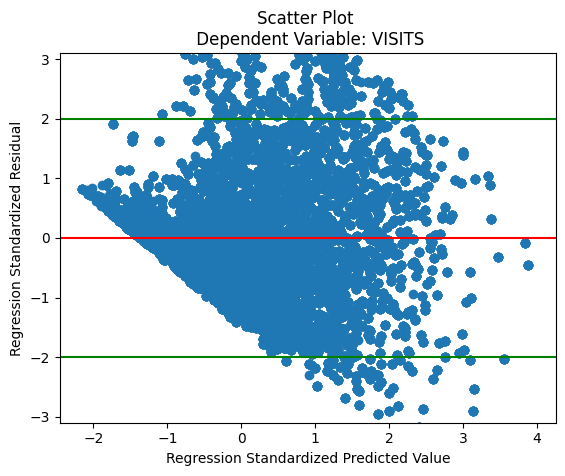

In [ ]:
from scipy.stats import zscore

# Get the predicted values of y
df_q1c['predicted_y'] = model.predict(X2)

# Standardized predictied value of the dependent variable
df_q1c['standardized_predicted_y'] = zscore(df_q1c['predicted_y'])

# Create scatter plot of Studendized residuals and predicted values
plt.scatter(df_q1c['standardized_predicted_y'], df_q1c['standardized_residuals'], label='Data')
#plt.xlim(-2.2, 2.2)
#plt.xticks(np.arange(-2, 2.2, 1))
plt.ylim(-3.1, 3.1)
plt.yticks(np.arange(-3, 3.1, 1))

plt.xlabel('Regression Standardized Predicted Value')
plt.ylabel('Regression Standardized Residual')
plt.title('Scatter Plot \n Dependent Variable: VISITS')

# Add two reference lines
plt.axhline(y=2, color='green', linestyle='-')
plt.axhline(y=-2, color='green', linestyle='-')

# Add reference lines
plt.axhline(y=0, color='red', linestyle='-')

# Filter out the data points with standardized_residuals > 2
high_standardized = df_q1c[np.abs(df_q1c['standardized_residuals']) > 2]

plt.show()

## Town Regression

In [ ]:
# Define the dependent variable
y = df_q1c['VISITS']

# Define the independent variables
X2 = df_q1c[['WIFISESS','TOTPRO','HRS_OPEN','LOCALE_ADD_Town']]

# Add a constant to the independent variables (this adds the intercept term)
X2 = sm.add_constant(X2)

# Fit the regression model
model2 = sm.OLS(y, X2).fit()

# get a summary of the regression models
print('\nModel with multiple predictors:', model2.summary())


Model with multiple predictors:                             OLS Regression Results                            
Dep. Variable:                 VISITS   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     7741.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:44:26   Log-Likelihood:            -2.9383e+05
No. Observations:               27499   AIC:                         5.877e+05
Df Residuals:                   27494   BIC:                         5.877e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const    

In [ ]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# Calculate Tolerance for each predictor
vif_data["Tolerance"] = 1 / vif_data["VIF"]

# Drop the constant term
vif_data = vif_data.drop(0)

# Print the result
print("Tolerance and VIF values:")
print(vif_data)

Tolerance and VIF values:
           Feature      VIF  Tolerance
1         WIFISESS 1.151978   0.868072
2           TOTPRO 1.313983   0.761045
3         HRS_OPEN 1.410496   0.708971
4  LOCALE_ADD_Town 1.094623   0.913556


## Regression Town Validation

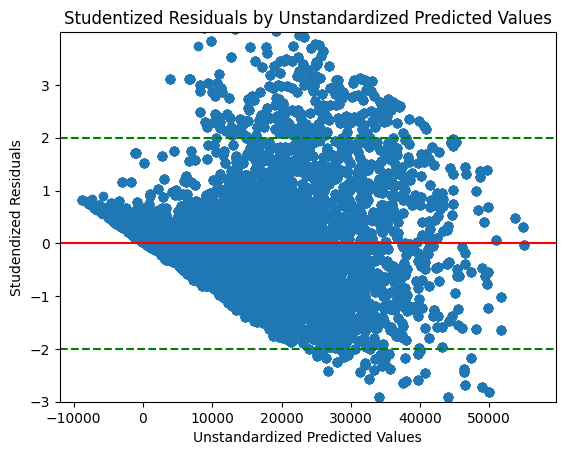

In [ ]:
#Generate the unstandardized predicted values
X2 = sm.add_constant(X2)  # Adds a constant term to the predictors
model = sm.OLS(y, X2).fit()
df_q1c['predicted_score'] = model.predict(X2)

# Generate the studendized residuals
df_q1c['studentized_residuals'] = model.get_influence().resid_studentized_internal

# Create scatter plot of Studendized residuals by Unstandardized Predicted Values
plt.scatter(df_q1c['predicted_score'], df_q1c['studentized_residuals'], label='Data')
#plt.xlim(0, 1)
#plt.xticks(np.arange(850, 1120, 50))
plt.ylim(-3, 4)
plt.yticks(np.arange(-3, 4, 1))

plt.xlabel('Unstandardized Predicted Values')
plt.ylabel('Studendized Residuals')
plt.title('Studentized Residuals by Unstandardized Predicted Values')

# Add reference lines y=0, y=2, y=-2
plt.axhline(y=0, color='red', linestyle='-', label='Reference Line at y=0')
plt.axhline(y=2, color='green', linestyle='--', label='Reference Line at y=2')
plt.axhline(y=-2, color='green', linestyle='--', label='Reference Line at y=-2')

plt.show()

In [ ]:
# Calculate Cook's D
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
df_q1c['Cooks_D'] = cooks_d

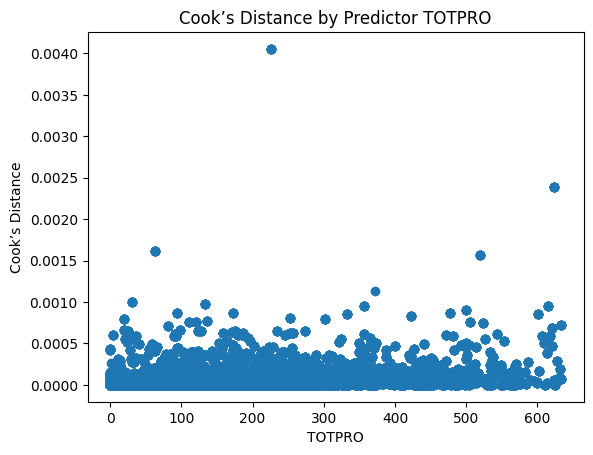

In [ ]:
# Create a scatter plot of Cook’s Distance by Predictor EXPEND
plt.scatter(df_q1c['TOTPRO'], df_q1c['Cooks_D'], label = 'Data')

#plt.ylim(0, 0.16)
#plt.yticks(np.arange(0, 0.16, 0.05))

# Add label and title
plt.xlabel('TOTPRO')
plt.ylabel('Cook’s Distance')
plt.title('Cook’s Distance by Predictor TOTPRO')

# Label each points
#for i in range(len(df)):
#   plt.annotate(df['DbaseID'][i], (df['DBH (cm)'][i], df['Cooks_D'][i]))

plt.show()

In [ ]:
# Standardized residuals above 2 are considered outliers in this case
df_q1c['residuals'] = model.resid

# Add predicted values (fitted values) to the dataframe
df_q1c['predicted_values'] = model.fittedvalues

std_residuals = np.std(df_q1c['residuals'], ddof=3)

# Calculate the standardized residuals
df_q1c['standardized_residuals'] = df_q1c['residuals'] / std_residuals

outliers = df_q1c[np.abs(df_q1c['standardized_residuals']) > 2]
print("\n========== Outliers ===========")
print(outliers)


========== Outliers ===========
       VISITS STABR  zipcode              CITY  \
433     56748    AL    36330        ENTERPRISE   
434     56748    AL    36330        ENTERPRISE   
435     56748    AL    36330        ENTERPRISE   
436     56748    AL    36330        ENTERPRISE   
437     56748    AL    36330        ENTERPRISE   
...       ...   ...      ...               ...   
53145   53758    WV    25303  SOUTH CHARLESTON   
53146   53758    WV    25303  SOUTH CHARLESTON   
53147   53758    WV    25303  SOUTH CHARLESTON   
53148   53758    WV    25303  SOUTH CHARLESTON   
53149   53758    WV    25303  SOUTH CHARLESTON   

                               LIBNAME     CNTY  POPU_LSA  BKVOL  AUDIO_PH  \
433          ENTERPRISE PUBLIC LIBRARY   COFFEE     43217  38386      1887   
434          ENTERPRISE PUBLIC LIBRARY   COFFEE     43217  38386      1887   
435          ENTERPRISE PUBLIC LIBRARY   COFFEE     43217  38386      1887   
436          ENTERPRISE PUBLIC LIBRARY   COFFEE     43

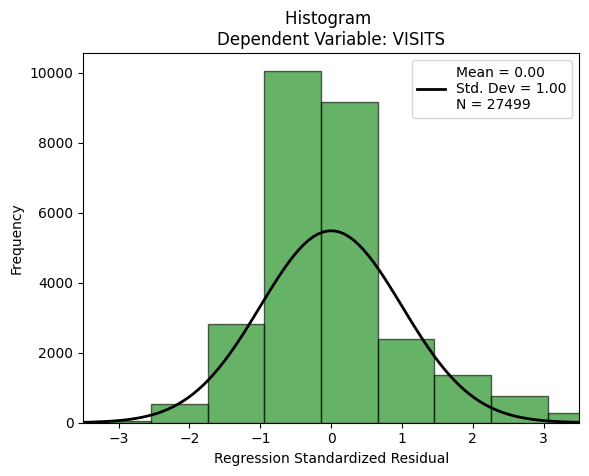

In [ ]:
# The standardized_residuals was created in above analysis
# Calculate statistics
mean = np.mean(df_q1c['standardized_residuals'])
std_dev = np.std(df_q1c['standardized_residuals'])
n = len(df_q1c['standardized_residuals'])

# Set the number of bins as identified from SPSS
bins_std_res = 12

# Create histogram (with actual frequencies on y-axis)
plt.hist(df_q1c['standardized_residuals'], bins=bins_std_res, density=False, alpha=0.6, color='g', edgecolor='black')

# Set axis limits
plt.xlim(-3.5, 3.5)
plt.xticks(np.arange(-3, 3.5, 1))

# Generate x values for the normal curve
x = np.linspace(-3.5, 3.5, 100)

# Calculate the normal distribution curve (scaled to match the histogram's total frequency)
p = norm.pdf(x, mean, std_dev) * n * (6.0 / bins_std_res)  # scale the curve to the histogram

# Plot the normal distribution line
plt.plot(x, p, 'k', linewidth=2)

# Add legend with Mean, Std. Dev, and N
legend_text = f'Mean = {mean:.2f}\nStd. Dev = {std_dev:.2f}\nN = {n}'
plt.legend([legend_text], loc='upper right')

# Add labels and title
plt.title('Histogram \nDependent Variable: VISITS')
plt.xlabel('Regression Standardized Residual')
plt.ylabel('Frequency')

# Show plot
plt.show()

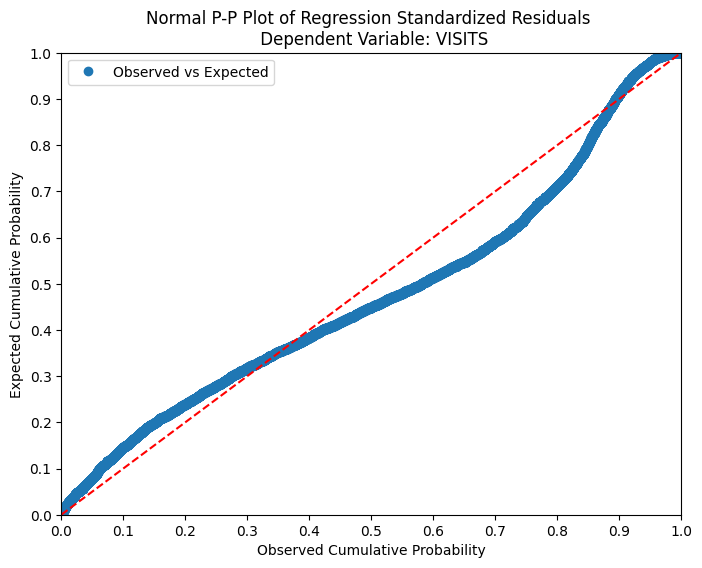

In [ ]:
# The standardized_residuals was created in above analysis
standardized_residuals = df_q1c['standardized_residuals']

# Rank-order the standardized residuals
sorted_residuals = np.sort(standardized_residuals)

# Calculate the observed cumulative probabilities
observed_cumprob = np.arange(1, len(sorted_residuals) + 1) / len(sorted_residuals)

# Calculate the expected cumulative probabilities based on a normal distribution
expected_cumprob = norm.cdf(sorted_residuals)

# Plot the observed cumulative probabilities against the expected cumulative probabilities
plt.figure(figsize=(8, 6))
plt.plot(observed_cumprob, expected_cumprob, 'o', label="Observed vs Expected")
plt.plot([0, 1], [0, 1], 'r--')

# Set axis limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Add labels and title
plt.title('Normal P-P Plot of Regression Standardized Residuals \n Dependent Variable: VISITS')
plt.xlabel('Observed Cumulative Probability')
plt.ylabel('Expected Cumulative Probability')
plt.legend()

# Show the plot
plt.show()

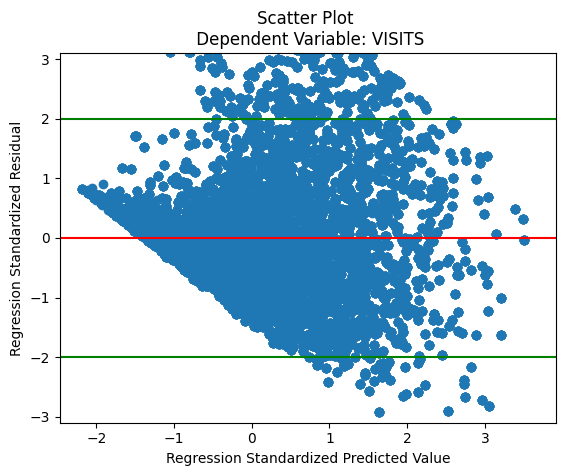

In [ ]:
from scipy.stats import zscore

# Get the predicted values of y
df_q1c['predicted_y'] = model.predict(X2)

# Standardized predictied value of the dependent variable
df_q1c['standardized_predicted_y'] = zscore(df_q1c['predicted_y'])

# Create scatter plot of Studendized residuals and predicted values
plt.scatter(df_q1c['standardized_predicted_y'], df_q1c['standardized_residuals'], label='Data')
#plt.xlim(-2.2, 2.2)
#plt.xticks(np.arange(-2, 2.2, 1))
plt.ylim(-3.1, 3.1)
plt.yticks(np.arange(-3, 3.1, 1))

plt.xlabel('Regression Standardized Predicted Value')
plt.ylabel('Regression Standardized Residual')
plt.title('Scatter Plot \n Dependent Variable: VISITS')

# Add two reference lines
plt.axhline(y=2, color='green', linestyle='-')
plt.axhline(y=-2, color='green', linestyle='-')

# Add reference lines
plt.axhline(y=0, color='red', linestyle='-')

# Filter out the data points with standardized_residuals > 2
high_standardized = df_q1c[np.abs(df_q1c['standardized_residuals']) > 2]

plt.show()

# Question 2: Do libraries pay fairly in relation to the local or state average cost of living? (Opportunity to pull in additional data into the dataset, merging on location) (Graphical)

## Question 2 Initialize

In [ ]:
#Sanity check
df['agi_stub']

,agi_stub
0,1.000000
1,2.000000
2,3.000000
3,4.000000
4,5.000000
...,...
53788,2.000000
53789,3.000000
53790,4.000000
53791,5.000000


In [ ]:
#New dataframe for question 2
df_q2 = df[['VISITS','STABR','OBEREG','LOCALE_ADD','STAFFEXP','SALARIES','zipcode', 'CITY','LIBNAME','CNTY','POPU_LSA','TOTSTAFF', 'OTHPAID','agi_stub']]
df_q2.head(5)

,VISITS,STABR,OBEREG,LOCALE_ADD,STAFFEXP,SALARIES,zipcode,CITY,LIBNAME,CNTY,POPU_LSA,TOTSTAFF,OTHPAID,agi_stub
0,5127,AK,8,43,-9,-9,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,0.680000,0.680000,1.000000
1,5127,AK,8,43,-9,-9,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,0.680000,0.680000,2.000000
2,5127,AK,8,43,-9,-9,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,0.680000,0.680000,3.000000
3,5127,AK,8,43,-9,-9,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,0.680000,0.680000,4.000000
4,5127,AK,8,43,-9,-9,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,0.680000,0.680000,5.000000


## Clean DataFrame

In [ ]:
#Sanity check
df_q2.shape

(37300, 14)

In [ ]:
#Sanity check
df_q2.describe()

,VISITS,OBEREG,LOCALE_ADD,STAFFEXP,SALARIES,zipcode,POPU_LSA,TOTSTAFF,OTHPAID,agi_stub
count,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,37300.000000,36990.000000
mean,14733.022118,3.553861,35.709973,154190.668794,119482.420456,44013.824718,7623.444799,3.501525,1.696860,3.500000
std,15250.754832,1.858711,8.330566,256361.859249,189764.016465,27750.251497,12213.054186,3.768336,2.543204,1.707848
min,-3.000000,1.000000,11.000000,-9.000000,-9.000000,602.000000,-9.000000,-3.000000,-3.000000,1.000000
25%,3217.000000,2.000000,32.000000,-9.000000,-9.000000,14459.250000,1536.000000,1.000000,0.000000,2.000000
50%,8541.000000,3.000000,41.000000,72277.000000,62729.000000,50216.000000,4004.000000,2.230000,0.750000,3.500000
75%,21463.000000,5.000000,42.000000,211510.000000,170032.500000,65608.000000,9232.000000,4.720000,2.352500,5.000000
max,65564.000000,9.000000,43.000000,4428135.000000,2820954.000000,99950.000000,395326.000000,40.300000,25.930000,6.000000


In [ ]:
# Remove rows where 'agi_stub' is NaN
df_q2 = df_q2.dropna(subset=['agi_stub'])

In [ ]:
#Sanity check
df_q2.shape

(36990, 14)

In [ ]:
# Drop rows where any column in df_q1 has a value of -1 or -3 <- again data encoded missing as -1 and -3
df_q2c = df_q2[(df_q2 != -1).all(axis=1) & (df_q2 != -3).all(axis=1)]

In [ ]:
#Sanity check
df_q2.shape

(36990, 14)

In [ ]:
#Sanity check
df_q2.describe()

,VISITS,OBEREG,LOCALE_ADD,STAFFEXP,SALARIES,zipcode,POPU_LSA,TOTSTAFF,OTHPAID,agi_stub
count,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000
mean,14802.510949,3.541930,35.695864,155044.380860,120155.969667,43992.327656,7577.278183,3.518683,1.705111,3.500000
std,15267.286430,1.843116,8.323783,256926.351504,190181.696697,27647.785769,11619.760055,3.771531,2.544233,1.707848
min,-3.000000,1.000000,11.000000,-9.000000,-9.000000,1001.000000,-9.000000,-3.000000,-3.000000,1.000000
25%,3256.000000,2.000000,32.000000,-9.000000,-9.000000,14472.000000,1545.000000,1.000000,0.000000,2.000000
50%,8616.000000,3.000000,41.000000,74499.000000,63779.000000,50217.000000,4035.000000,2.250000,0.750000,3.500000
75%,21518.000000,5.000000,42.000000,212497.000000,170504.000000,65301.000000,9245.000000,4.750000,2.380000,5.000000
max,65564.000000,8.000000,43.000000,4428135.000000,2820954.000000,99901.000000,312549.000000,40.300000,25.930000,6.000000


In [ ]:
#create new column of staffexp / TOTSTAFF called average salary
df_q2c['average_salary'] = df_q2c['STAFFEXP'] / df_q2c['TOTSTAFF']

<ipython-input-560-db1a59736e94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q2c['average_salary'] = df_q2c['STAFFEXP'] / df_q2c['TOTSTAFF']


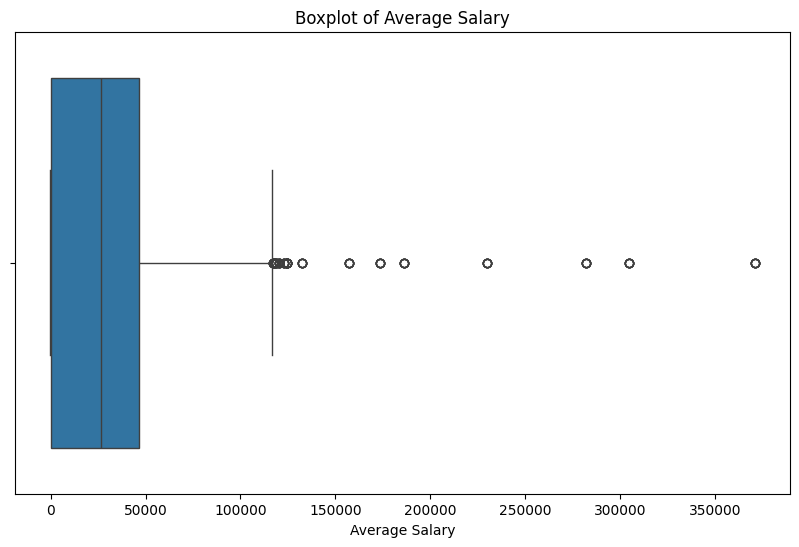

In [ ]:
# boxplot of salary
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_q2c['average_salary'])
plt.title('Boxplot of Average Salary')
plt.xlabel('Average Salary')
plt.show()


In [ ]:
# Categories for agi_stub to match
# 1 = $1 under $25,000
# 2 = $25,000 under $50,000
# 3 = $50,000 under $75,000
# 4 = $75,000 under $100,000
# 5 = $100,000 under $200,000
# 6 = $200,000 or more

# Create a new column 'salary_category' based on 'average_salary'
for index, row in df_q2c.iterrows():
    if row['average_salary'] < 25000:
        df_q2c.loc[index, 'salary_category'] = 1
    elif row['average_salary'] < 50000:
        df_q2c.loc[index, 'salary_category'] = 2
    elif row['average_salary'] < 75000:
        df_q2c.loc[index, 'salary_category'] = 3
    elif row['average_salary'] < 100000:
        df_q2c.loc[index, 'salary_category'] = 4
    elif row['average_salary'] < 200000:
        df_q2c.loc[index, 'salary_category'] = 5
    else:
        df_q2c.loc[index, 'salary_category'] = 6


<ipython-input-562-a18f557f2214>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q2c.loc[index, 'salary_category'] = 1


In [ ]:
# Categoricalize Locale_add, could have done for loop or def
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(11, 'City')
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(12, 'City')
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(13, 'City')
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(21, 'Suburb')
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(22, 'Suburb')
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(23, 'Suburb')
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(31, 'Town')
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(32, 'Town')
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(33, 'Town')
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(41, 'Rural')
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(42, 'Rural')
df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(43, 'Rural')


<ipython-input-563-f48b2f04a026>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(11, 'City')
<ipython-input-563-f48b2f04a026>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q2c['LOCALE_ADD'] = df_q2c['LOCALE_ADD'].replace(12, 'City')
<ipython-input-563-f48b2f04a026>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
#change values in OBEREG as 1 = NE, 2 = ME, 3 = GL, 4 = PL, 5 = SE, 6 = SW, 7 = RM, 8 = FW, 9 = OA
region_new = {
    1: 'NE',
    2: 'ME',
    3: 'GL',
    4: 'PL',
    5: 'SE',
    6: 'SW',
    7: 'RM',
    8: 'FW',
    9: 'OA'
}

# Apply region_new using a for loop
for index, row in df_q2c.iterrows():
    if row['OBEREG'] in region_new:
        df_q2c.loc[index, 'OBEREG'] = region_new[row['OBEREG']]


<ipython-input-564-af8250092090>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'FW' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_q2c.loc[index, 'OBEREG'] = region_new[row['OBEREG']]


## Graphics, Plots

In [ ]:
#count number of matches for each row where salary_category = agi_stub
match_counts = df_q2c[df_q2c['salary_category'] == df_q2c['agi_stub']].shape[0]

print(f"Number of matches where salary_category equals agi_stub: {match_counts}")

non_match = df_q2c[df_q2c['salary_category'] != df_q2c['agi_stub']].shape[0]

print(f"Number of non-matches where salary_category equals agi_stub: {non_match}")

Number of matches where salary_category equals agi_stub: 6134
Number of non-matches where salary_category equals agi_stub: 30670


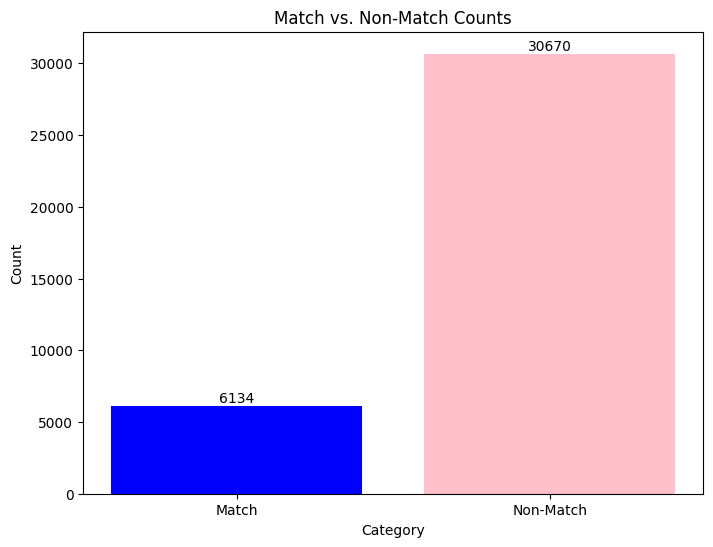

In [ ]:
#graph match_counts and non_match counts

# Data for the bar chart
categories = ['Match', 'Non-Match']
counts = [match_counts, non_match]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'pink'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Match vs. Non-Match Counts')

# Add value labels above each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


In [ ]:
# Group by 'OBEREG' and 'LOCALE_ADD', then count matches and non-matches
result = df_q2c.groupby(['OBEREG', 'LOCALE_ADD']).apply(lambda x: pd.Series({
    'matches': (x['salary_category'] == x['agi_stub']).sum(),
    'non_matches': (x['salary_category'] != x['agi_stub']).sum()
})).reset_index()

result


<ipython-input-567-30f2f3524981>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_q2c.groupby(['OBEREG', 'LOCALE_ADD']).apply(lambda x: pd.Series({


,OBEREG,LOCALE_ADD,matches,non_matches
0,FW,City,12,60
1,FW,Rural,77,385
2,FW,Suburb,36,180
3,FW,Town,64,320
4,GL,City,6,30
5,GL,Rural,662,3310
6,GL,Suburb,210,1050
7,GL,Town,364,1820
8,ME,City,7,35
9,ME,Rural,354,1770


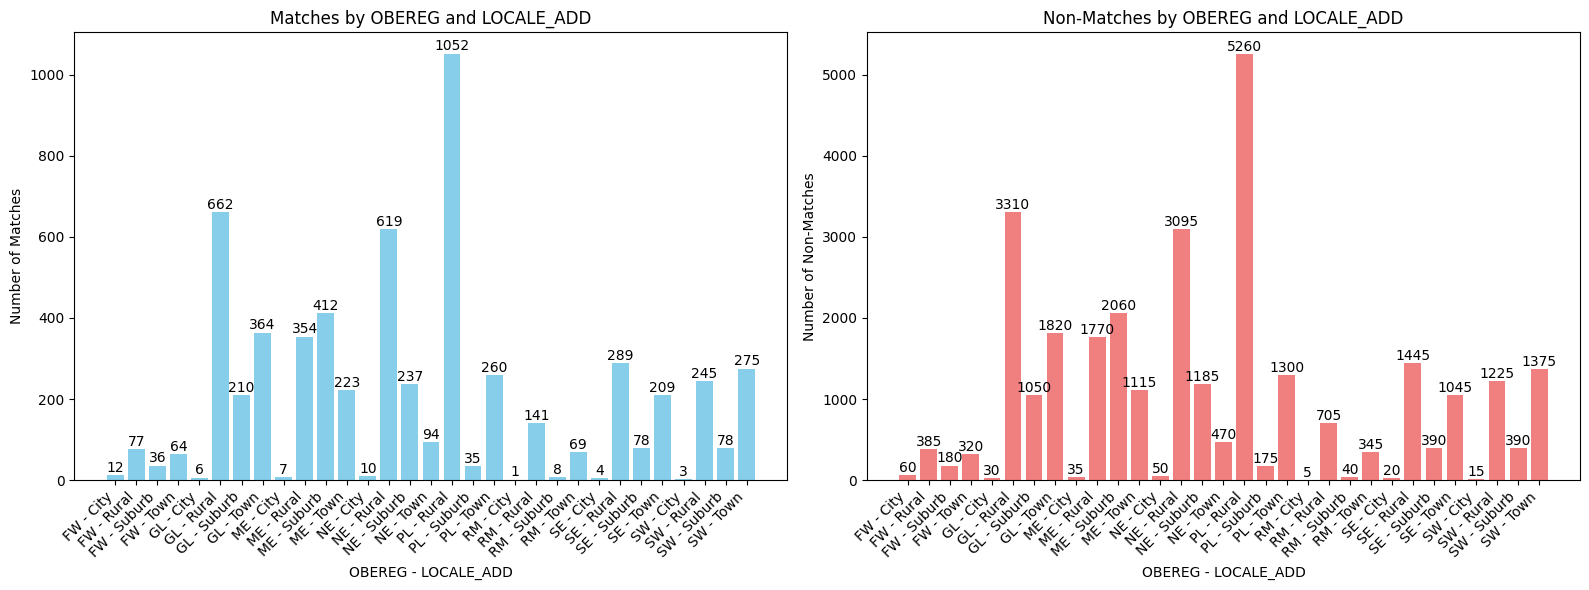

In [ ]:
#two bar charts for matches and non_matches by OBEREG and LOCALE_ADD

# Create the bar charts
plt.figure(figsize=(16, 6))

#Matches
plt.subplot(1, 2, 1)
bars = plt.bar(result['OBEREG'] + ' - ' + result['LOCALE_ADD'], result['matches'], color='skyblue')
plt.xlabel('OBEREG - LOCALE_ADD')
plt.ylabel('Number of Matches')
plt.title('Matches by OBEREG and LOCALE_ADD')
plt.xticks(rotation=45, ha='right')

# Add total value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5 , yval, ha='center', va='bottom')

#Non-matches
plt.subplot(1, 2, 2)
bars = plt.bar(result['OBEREG'] + ' - ' + result['LOCALE_ADD'], result['non_matches'], color='lightcoral')
plt.xlabel('OBEREG - LOCALE_ADD')
plt.ylabel('Number of Non-Matches')
plt.title('Non-Matches by OBEREG and LOCALE_ADD')
plt.xticks(rotation=45, ha='right')

# Add total value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')


plt.tight_layout() # prevent overlapping labels
plt.show()

In [ ]:
# combine OBEREG and LOCALE_ADD for each row, store in column chi_cat under result df
result['chi_cat'] = result['OBEREG'] + ' - ' + result['LOCALE_ADD']
result

,OBEREG,LOCALE_ADD,matches,non_matches,chi_cat
0,FW,City,12,60,FW - City
1,FW,Rural,77,385,FW - Rural
2,FW,Suburb,36,180,FW - Suburb
3,FW,Town,64,320,FW - Town
4,GL,City,6,30,GL - City
5,GL,Rural,662,3310,GL - Rural
6,GL,Suburb,210,1050,GL - Suburb
7,GL,Town,364,1820,GL - Town
8,ME,City,7,35,ME - City
9,ME,Rural,354,1770,ME - Rural


In [ ]:
# export result to csv for excel ANOG
result.to_csv('result.csv', index=False)

In [ ]:
df_q2c.head(5)

,VISITS,STABR,OBEREG,LOCALE_ADD,STAFFEXP,SALARIES,zipcode,CITY,LIBNAME,CNTY,POPU_LSA,TOTSTAFF,OTHPAID,agi_stub,average_salary,salary_category
0,5127,AK,FW,Rural,-9,-9,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,0.680000,0.680000,1.000000,-13.235294,1.000000
1,5127,AK,FW,Rural,-9,-9,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,0.680000,0.680000,2.000000,-13.235294,1.000000
2,5127,AK,FW,Rural,-9,-9,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,0.680000,0.680000,3.000000,-13.235294,1.000000
3,5127,AK,FW,Rural,-9,-9,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,0.680000,0.680000,4.000000,-13.235294,1.000000
4,5127,AK,FW,Rural,-9,-9,99556,ANCHOR POINT,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,2105,0.680000,0.680000,5.000000,-13.235294,1.000000


In [ ]:
#Note for later: can do this with def

# Calculate the average agi_stub and salary_category for PL – Rural
subset = df_q2c[(df_q2c['OBEREG'] == 'PL') & (df_q2c['LOCALE_ADD'] == 'Rural')]
average_agi_stub = subset['agi_stub'].mean()
average_salary_category = subset['salary_category'].mean()

print(f"Average agi_stub PL – Rural: {average_agi_stub}")
print(f"Average salary_category PL – Rural: {average_salary_category}")
print("\n-------------------\n")

# Calculate the average agi_stub and salary_category for ME – Suburb
subset = df_q2c[(df_q2c['OBEREG'] == 'ME') & (df_q2c['LOCALE_ADD'] == 'Suburb')]
average_agi_stub = subset['agi_stub'].mean()
average_salary_category = subset['salary_category'].mean()

print(f"Average agi_stub ME – Suburb: {average_agi_stub}")
print(f"Average salary_category ME – Suburb: {average_salary_category}")
print("\n-------------------\n")

# Calculate the average agi_stub and salary_category for GL - Rural
subset = df_q2c[(df_q2c['OBEREG'] == 'GL') & (df_q2c['LOCALE_ADD'] == 'Rural')]
average_agi_stub = subset['agi_stub'].mean()
average_salary_category = subset['salary_category'].mean()

print(f"Average agi_stub GL - Rural: {average_agi_stub}")
print(f"Average salary_category GL - Rural: {average_salary_category}")
print("\n-------------------\n")

# Calculate the average agi_stub and salary_category for NE - Rural
subset = df_q2c[(df_q2c['OBEREG'] == 'NE') & (df_q2c['LOCALE_ADD'] == 'Rural')]
average_agi_stub = subset['agi_stub'].mean()
average_salary_category = subset['salary_category'].mean()

print(f"Average agi_stub NE - Rural: {average_agi_stub}")
print(f"Average salary_category NE - Rural: {average_salary_category}")
print("\n-------------------\n")

# Calculate the average agi_stub and salary_category for GL -Town
subset = df_q2c[(df_q2c['OBEREG'] == 'GL') & (df_q2c['LOCALE_ADD'] == 'Town')]
average_agi_stub = subset['agi_stub'].mean()
average_salary_category = subset['salary_category'].mean()

print(f"Average agi_stub GL -Town: {average_agi_stub}")
print(f"Average salary_category GL -Town: {average_salary_category}")
print("\n-------------------\n")

Average agi_stub PL – Rural: 3.5
Average salary_category PL – Rural: 1.1577946768060836

-------------------

Average agi_stub ME – Suburb: 3.5
Average salary_category ME – Suburb: 2.4611650485436893

-------------------

Average agi_stub GL - Rural: 3.5
Average salary_category GL - Rural: 1.4697885196374623

-------------------

Average agi_stub NE - Rural: 3.5
Average salary_category NE - Rural: 1.4701130856219708

-------------------

Average agi_stub GL -Town: 3.5
Average salary_category GL -Town: 2.090659340659341

-------------------



End of Notebook